В этом небольшом проекте будут протестированны различные методы градиентного спуска

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2



#### Градиент MSE в матричном виде.

Функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Градиент для функции потерь MSE в матричном виде.

$$\nabla_{\omega} MSE(\omega) = \frac{2}{l} X^T (X\omega - y)$$

### Полный градиентный спуск VanillaGradientDescent

Полный градиентный спуск реализован в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращает разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска я использую следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем случае отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Стохастический градиентный спуск StochasticDescent.

Стохастический градиентный спуск реализован в классе `StochasticDescent`. Для оценки градиента используется формула выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплировать индексы для батча объектов будем с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Метод Momentum MomentumDescent.

Градиентный спуск с методом инерции реализован в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Метод Adam (Adaptive Moment Estimation).

![](adam_meme.png)

Градиентный спуск с методом Adam реализован в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы.

## Реализация линейной регресии

Реализацию линейной регресии, обучаемой с использованием градиентного спуска, написана в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

В реализации соблюдаются следующие условия:

* Все вычисления  быть векторизованы;
* Циклы средствами python используются только для итераций градиентного спуска;
* В качестве критерия останова используются (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

### Небольшая проверка кода


In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

import numpy as np
import sklearn

from descents import get_descent
from linear_regression import LinearRegression

D:\MachineLearning\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [4]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [5]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

#### Итого, я реализовал следующие виды градиентного спуска:

* **VanillaGradientDescent**:


* **StochasticDescent**:


* **MomentumDescent**:


* **Adam**:


* **LinearRegression**:

## EDA

Для анализа методов градиентного спуска будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

Проведем небольшой анализ данный, основной задачей будет являться сравнение градиентов.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

%config InlineBackend.figure_format = 'retina'

sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 12

In [7]:
data = pd.read_csv('autos.csv')

In [8]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241190 entries, 0 to 241189
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   brand              241190 non-null  object
 1   model              241190 non-null  object
 2   vehicleType        241190 non-null  object
 3   gearbox            241190 non-null  object
 4   fuelType           241190 non-null  object
 5   notRepairedDamage  241190 non-null  object
 6   powerPS            241190 non-null  int64 
 7   kilometer          241190 non-null  int64 
 8   autoAgeMonths      241190 non-null  int64 
 9   price              241190 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 18.4+ MB


Можно заметить, что есть аномальные максимальные и минимальные цены машин. В дальнейшем, выкинем эти объекты из данных

In [10]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price
count,241190.000000,241190.000000,241190.000000,241190.000000
mean,131.271628,123766.677723,144.768676,6887.741892
std,60.622613,39825.955933,73.092598,8024.451993
min,51.000000,5000.000000,1.000000,1.000000
25%,90.000000,100000.000000,92.000000,1750.000000
50%,120.000000,150000.000000,140.000000,4100.000000
75%,160.000000,150000.000000,192.000000,8999.000000
max,589.000000,150000.000000,600.000000,99999.000000


Text(0, 0.5, 'Number of records')

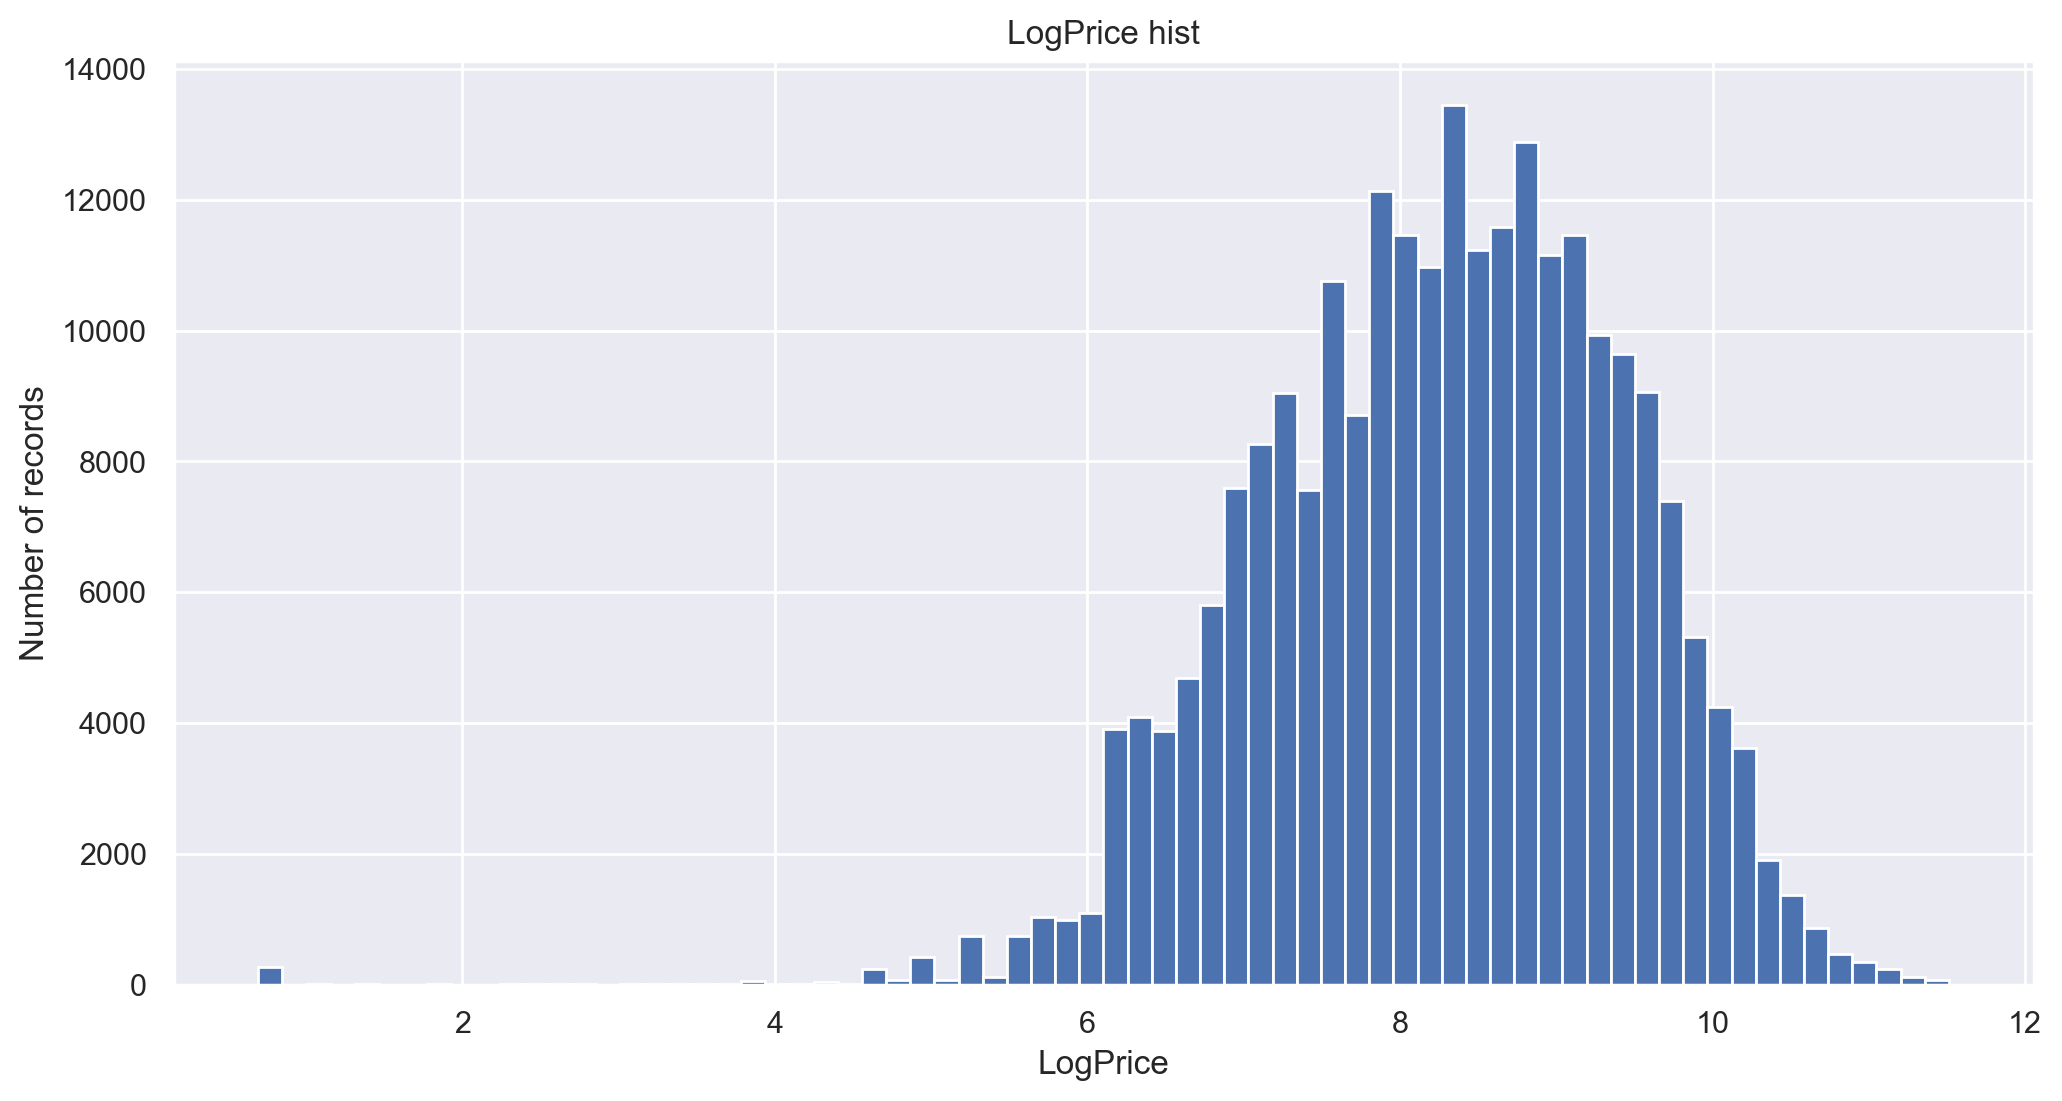

In [11]:
plt.hist(np.log1p(data['price']), bins=70)
plt.title('LogPrice hist')
plt.xlabel('LogPrice')
plt.ylabel('Number of records')

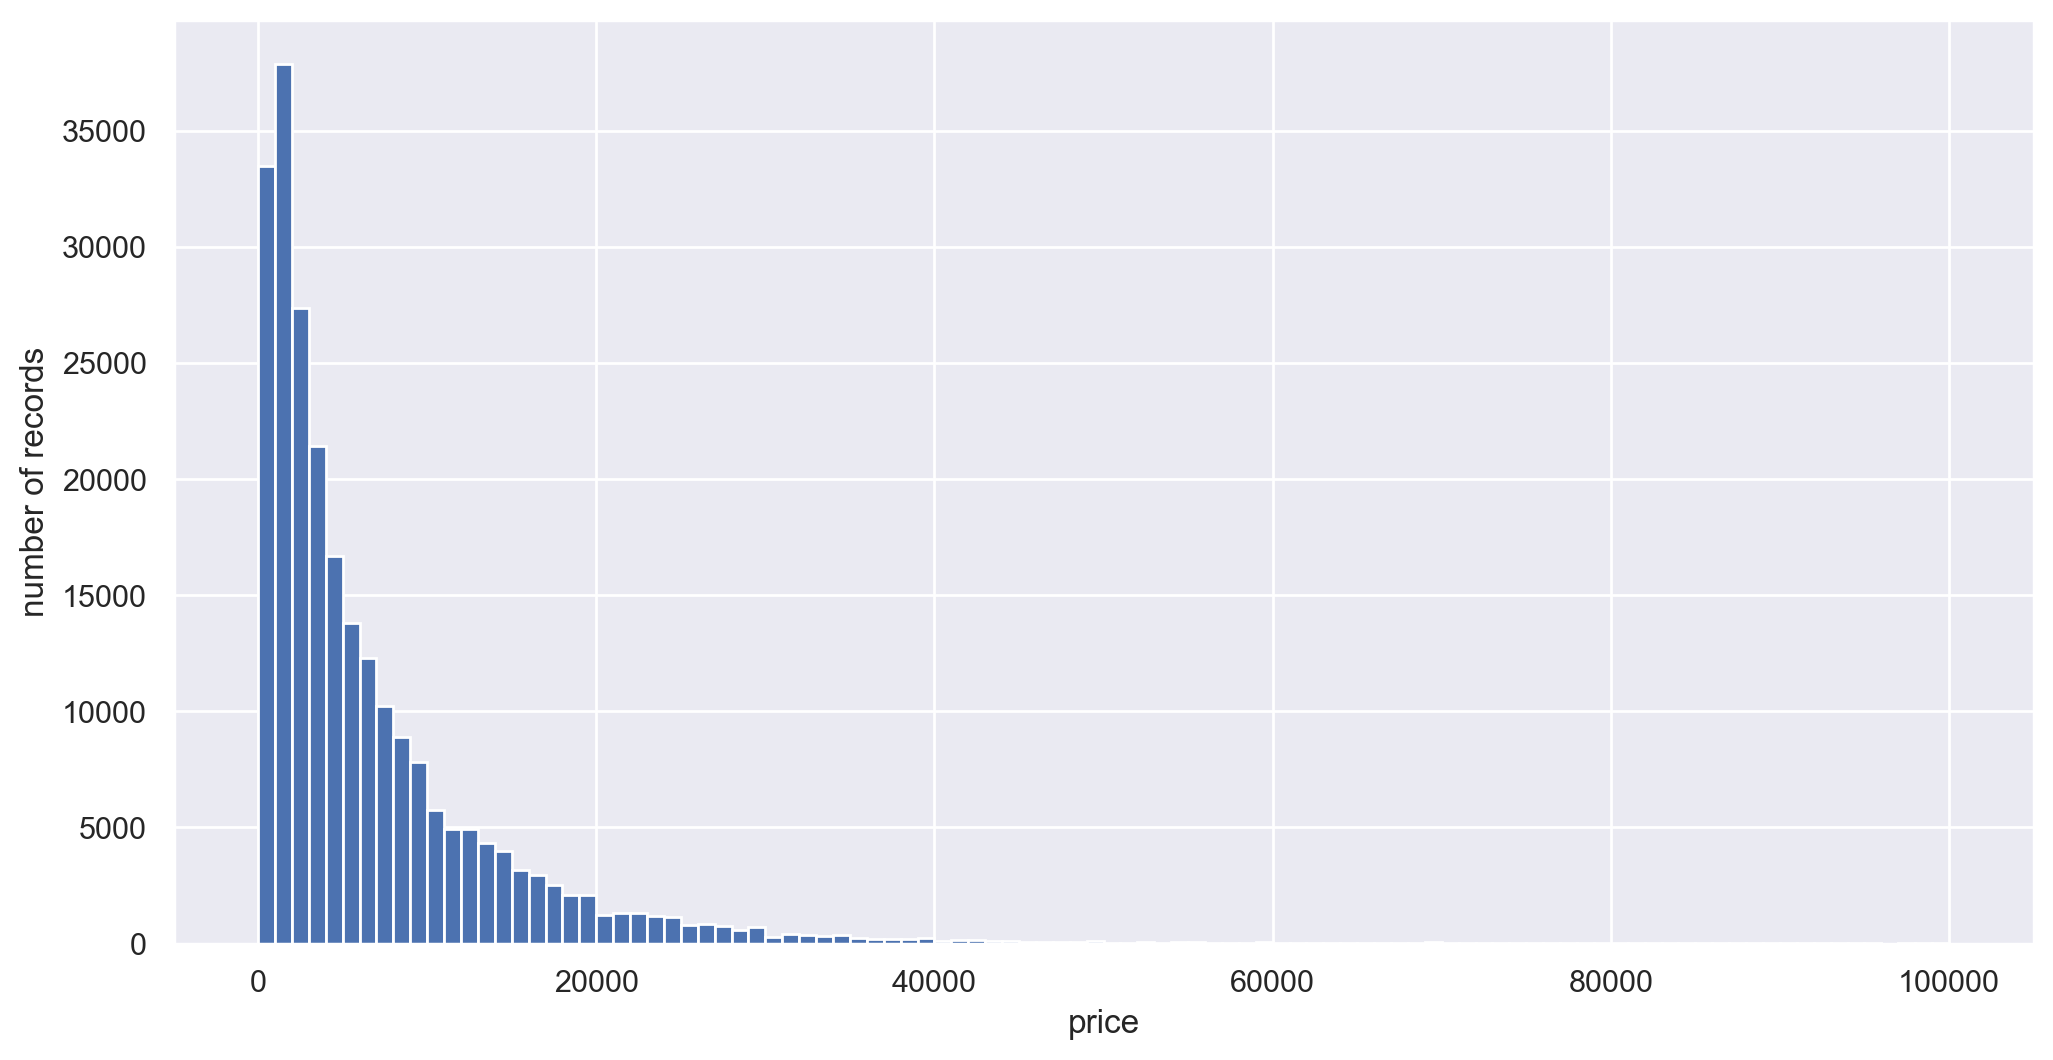

In [12]:
plt.hist(data['price'], bins=100)
plt.xlabel('price')
plt.ylabel('number of records')
plt.show()

In [13]:
data['logPrice'] = np.log1p(data['price'])

In [14]:
data[data['price'] < np.percentile(data['price'], 1)]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,logPrice
47,mercedes_benz,e_klasse,limousine,manuell,diesel,nein,113,150000,252,1,0.693147
167,audi,80,limousine,manuell,benzin,nein,90,70000,309,1,0.693147
306,seat,ibiza,kleinwagen,manuell,benzin,nein,60,150000,245,200,5.303305
518,opel,corsa,coupe,manuell,benzin,nein,55,125000,228,180,5.198497
526,renault,twingo,kleinwagen,automatik,benzin,ja,58,150000,135,200,5.303305
...,...,...,...,...,...,...,...,...,...,...,...
240571,nissan,micra,kleinwagen,manuell,benzin,nein,60,125000,195,200,5.303305
240707,mazda,3_reihe,limousine,manuell,benzin,ja,88,150000,216,100,4.615121
240714,citroen,andere,kleinwagen,manuell,benzin,ja,60,150000,211,90,4.510860
241127,opel,astra,kleinwagen,manuell,benzin,ja,55,150000,277,150,5.017280


In [15]:
data[data['price'] > np.percentile(data['price'], 99.5)]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,logPrice
163,audi,a6,limousine,automatik,diesel,nein,326,5000,9,56900,10.949068
165,mercedes_benz,andere,coupe,automatik,diesel,nein,265,80000,18,48000,10.778977
504,bmw,andere,cabrio,automatik,diesel,nein,313,60000,20,47999,10.778956
652,jeep,grand,suv,automatik,diesel,nein,250,30000,30,46950,10.756860
818,bmw,5er,kombi,automatik,diesel,nein,258,5000,13,51000,10.839601
...,...,...,...,...,...,...,...,...,...,...,...
240063,mercedes_benz,andere,coupe,automatik,benzin,nein,557,70000,56,74999,11.225243
240232,mercedes_benz,vito,bus,automatik,diesel,nein,190,5000,1,49500,10.809748
240236,porsche,911,coupe,manuell,benzin,nein,300,150000,257,49900,10.817796
241012,land_rover,defender,suv,manuell,diesel,nein,122,5000,1,69900,11.154835


In [16]:
data = data[data['price'] > np.percentile(data['price'], 1)]

In [17]:
data = data[data['price'] < np.percentile(data['price'], 99.5)]

In [18]:
data.describe()

,powerPS,kilometer,autoAgeMonths,price,logPrice
count,237289.000000,237289.000000,237289.000000,237289.000000,237289.000000
mean,130.815449,123937.139943,144.123630,6692.572934,8.293134
std,58.776524,39575.606887,72.408652,7028.580799,1.069047
min,51.000000,5000.000000,1.000000,251.000000,5.529429
25%,90.000000,100000.000000,92.000000,1800.000000,7.496097
50%,120.000000,150000.000000,139.000000,4200.000000,8.343078
75%,160.000000,150000.000000,191.000000,8990.000000,9.103979
max,589.000000,150000.000000,600.000000,46890.000000,10.755581


<AxesSubplot:>

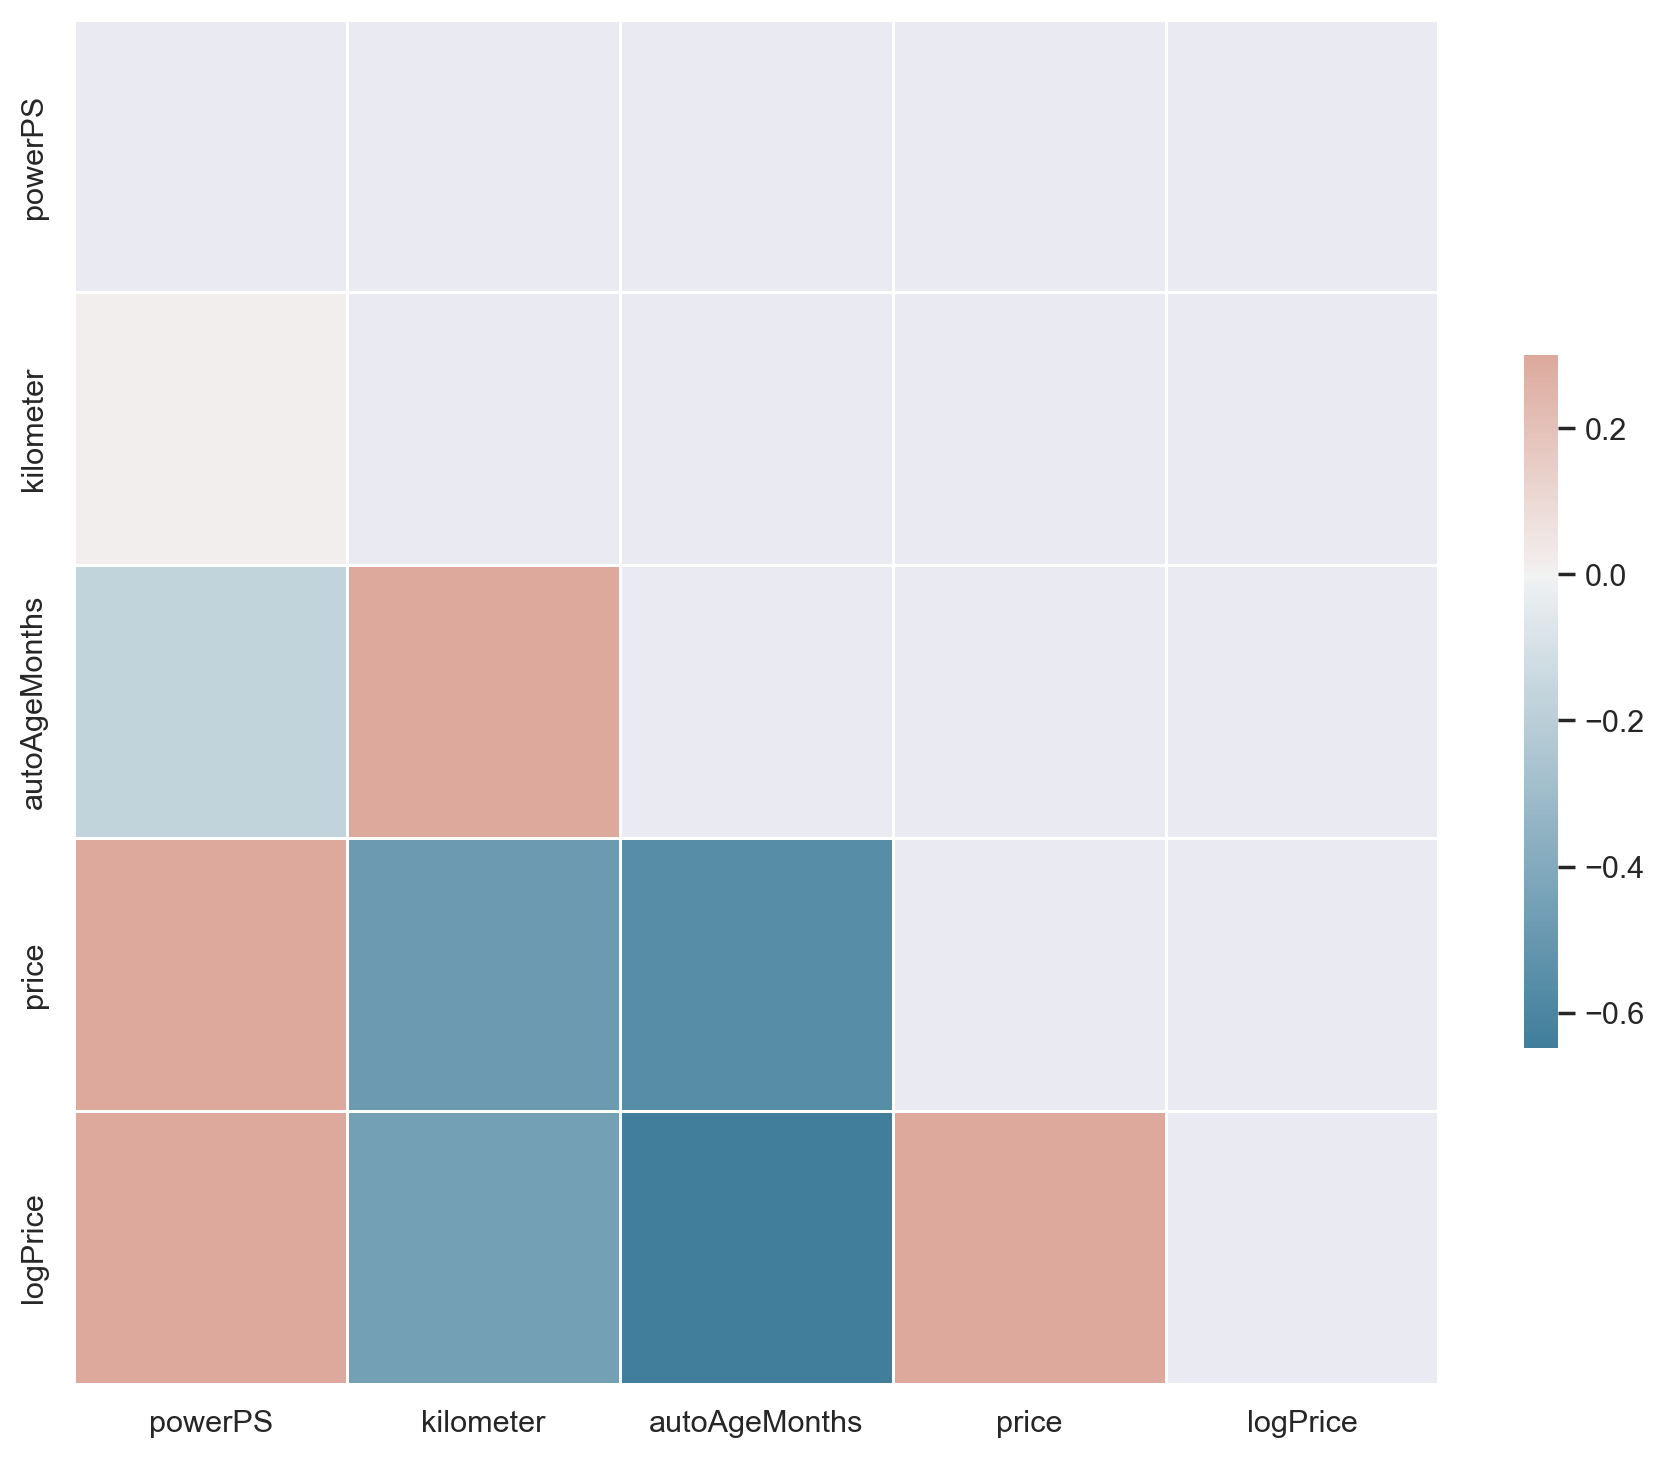

In [19]:
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Марки автомобилей
Porsche и еще несколько марок имеют в среднеем большую цену, но будет неправильно выделять их в отдельную группу и создовать признак, потому что, например, chevrolet дорогая марка автомобиля, но конкрено в нашем датасете стоит не так много.

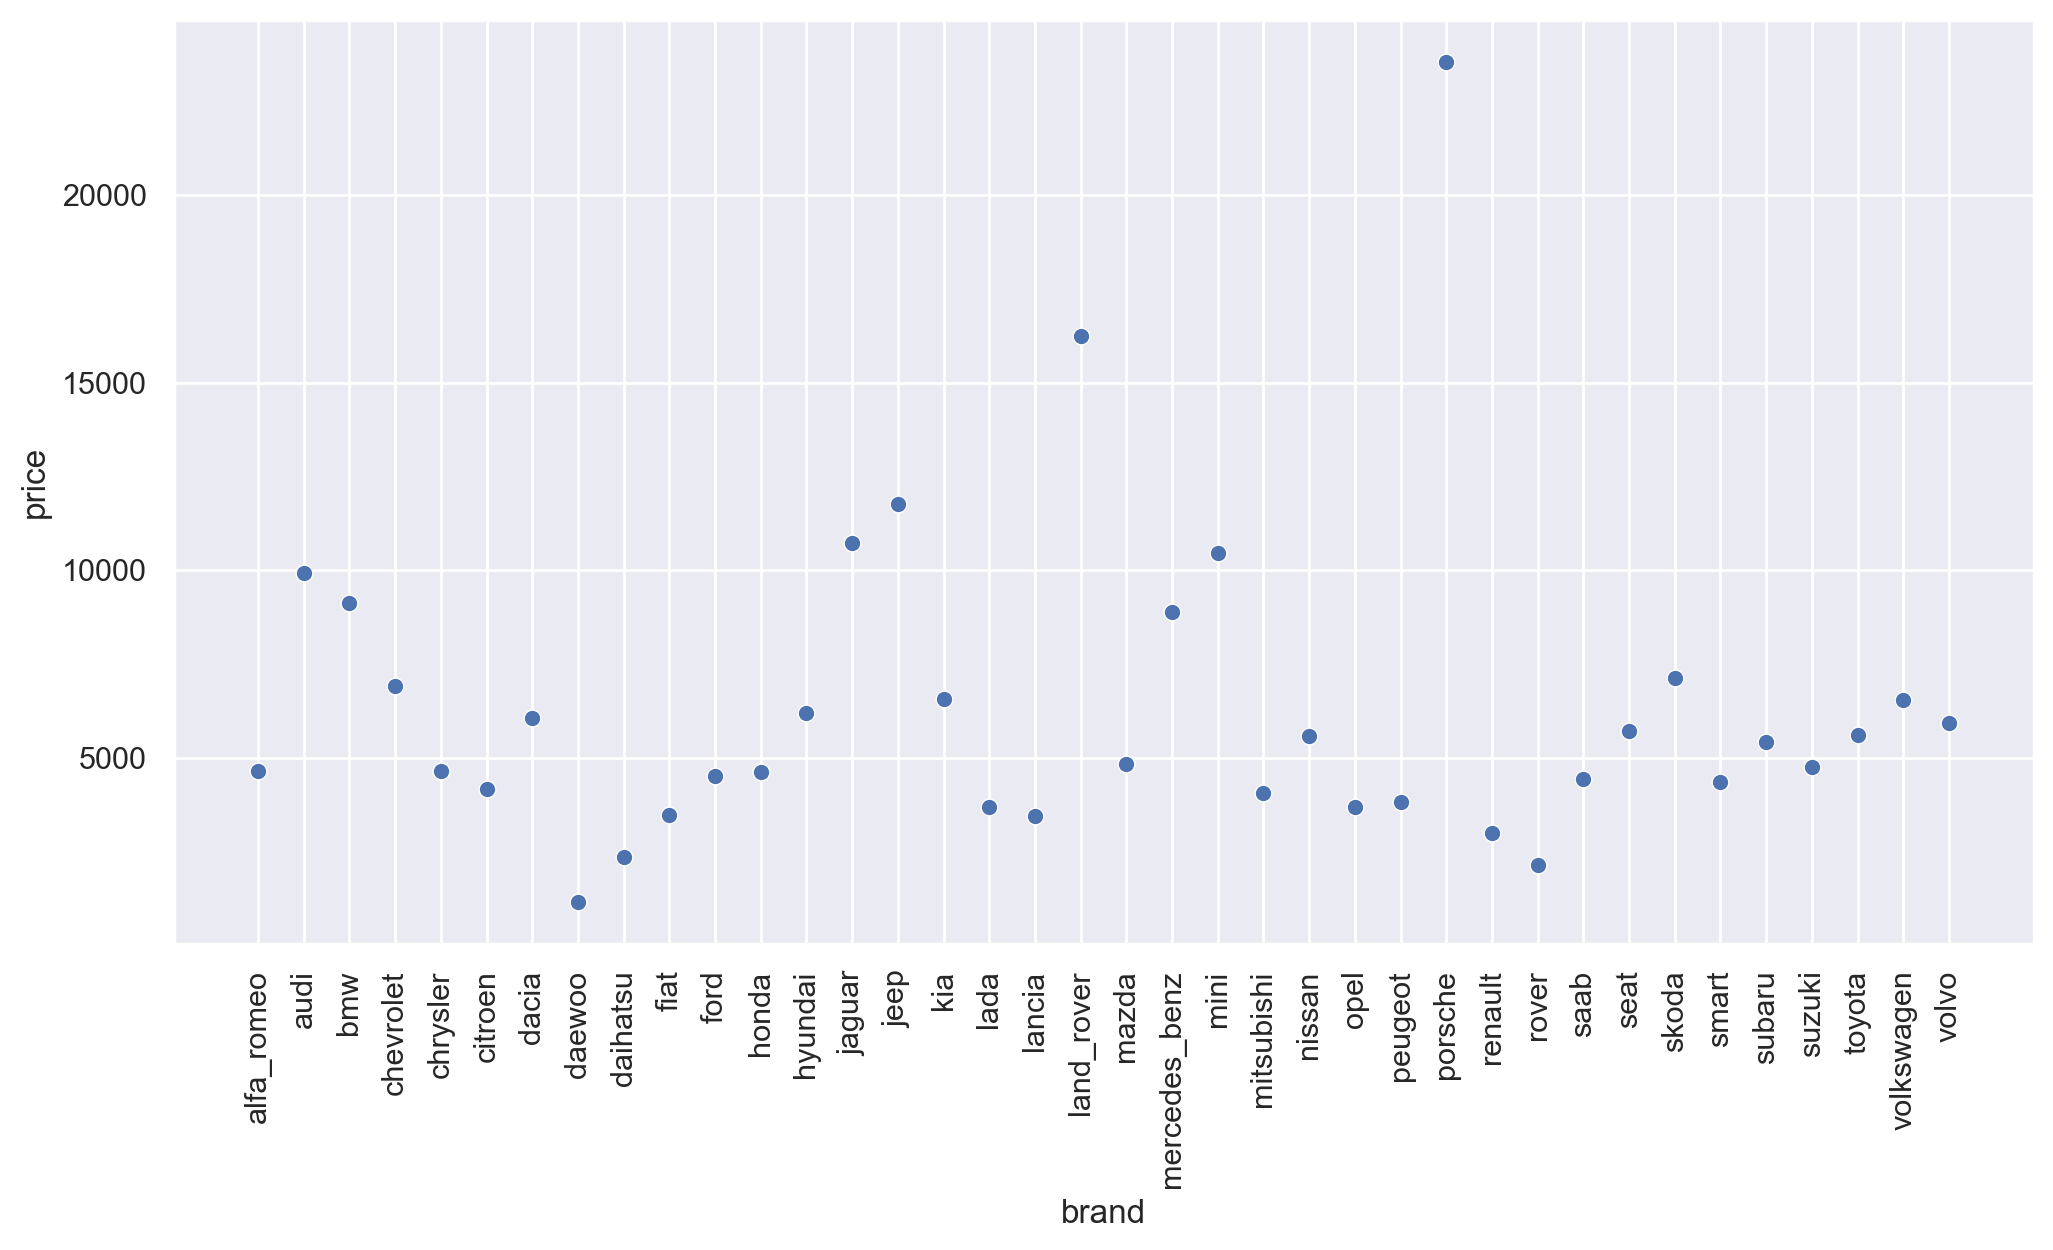

In [20]:
sns.scatterplot(x="brand", y="price",data=data.groupby('brand').mean())
# rotate x-axis labels
plt.xticks(rotation=90)
# display the plot
plt.show()

### Марки + модели
Имеет смысл посмотреть на марку и модель машины одновременно и найти самые дорогие варианты.

In [21]:
# Calculate the percentile threshold
price_threshold = np.percentile(data['price'], 90)

# Filter the groups based on the mean price
groups_filtered = data.groupby(['brand', 'model']).filter(lambda x: x['price'].mean() > price_threshold)
groups_filtered.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,logPrice
26,bmw,andere,coupe,automatik,benzin,nein,306,30000,21,39600,10.586610
81,mercedes_benz,glk,suv,automatik,diesel,nein,204,40000,19,41900,10.643065
95,ford,mustang,cabrio,manuell,benzin,nein,305,50000,116,19750,9.890959
106,ford,mustang,coupe,automatik,benzin,nein,305,90000,569,25000,10.126671
152,porsche,andere,coupe,manuell,benzin,nein,265,125000,82,25900,10.162037


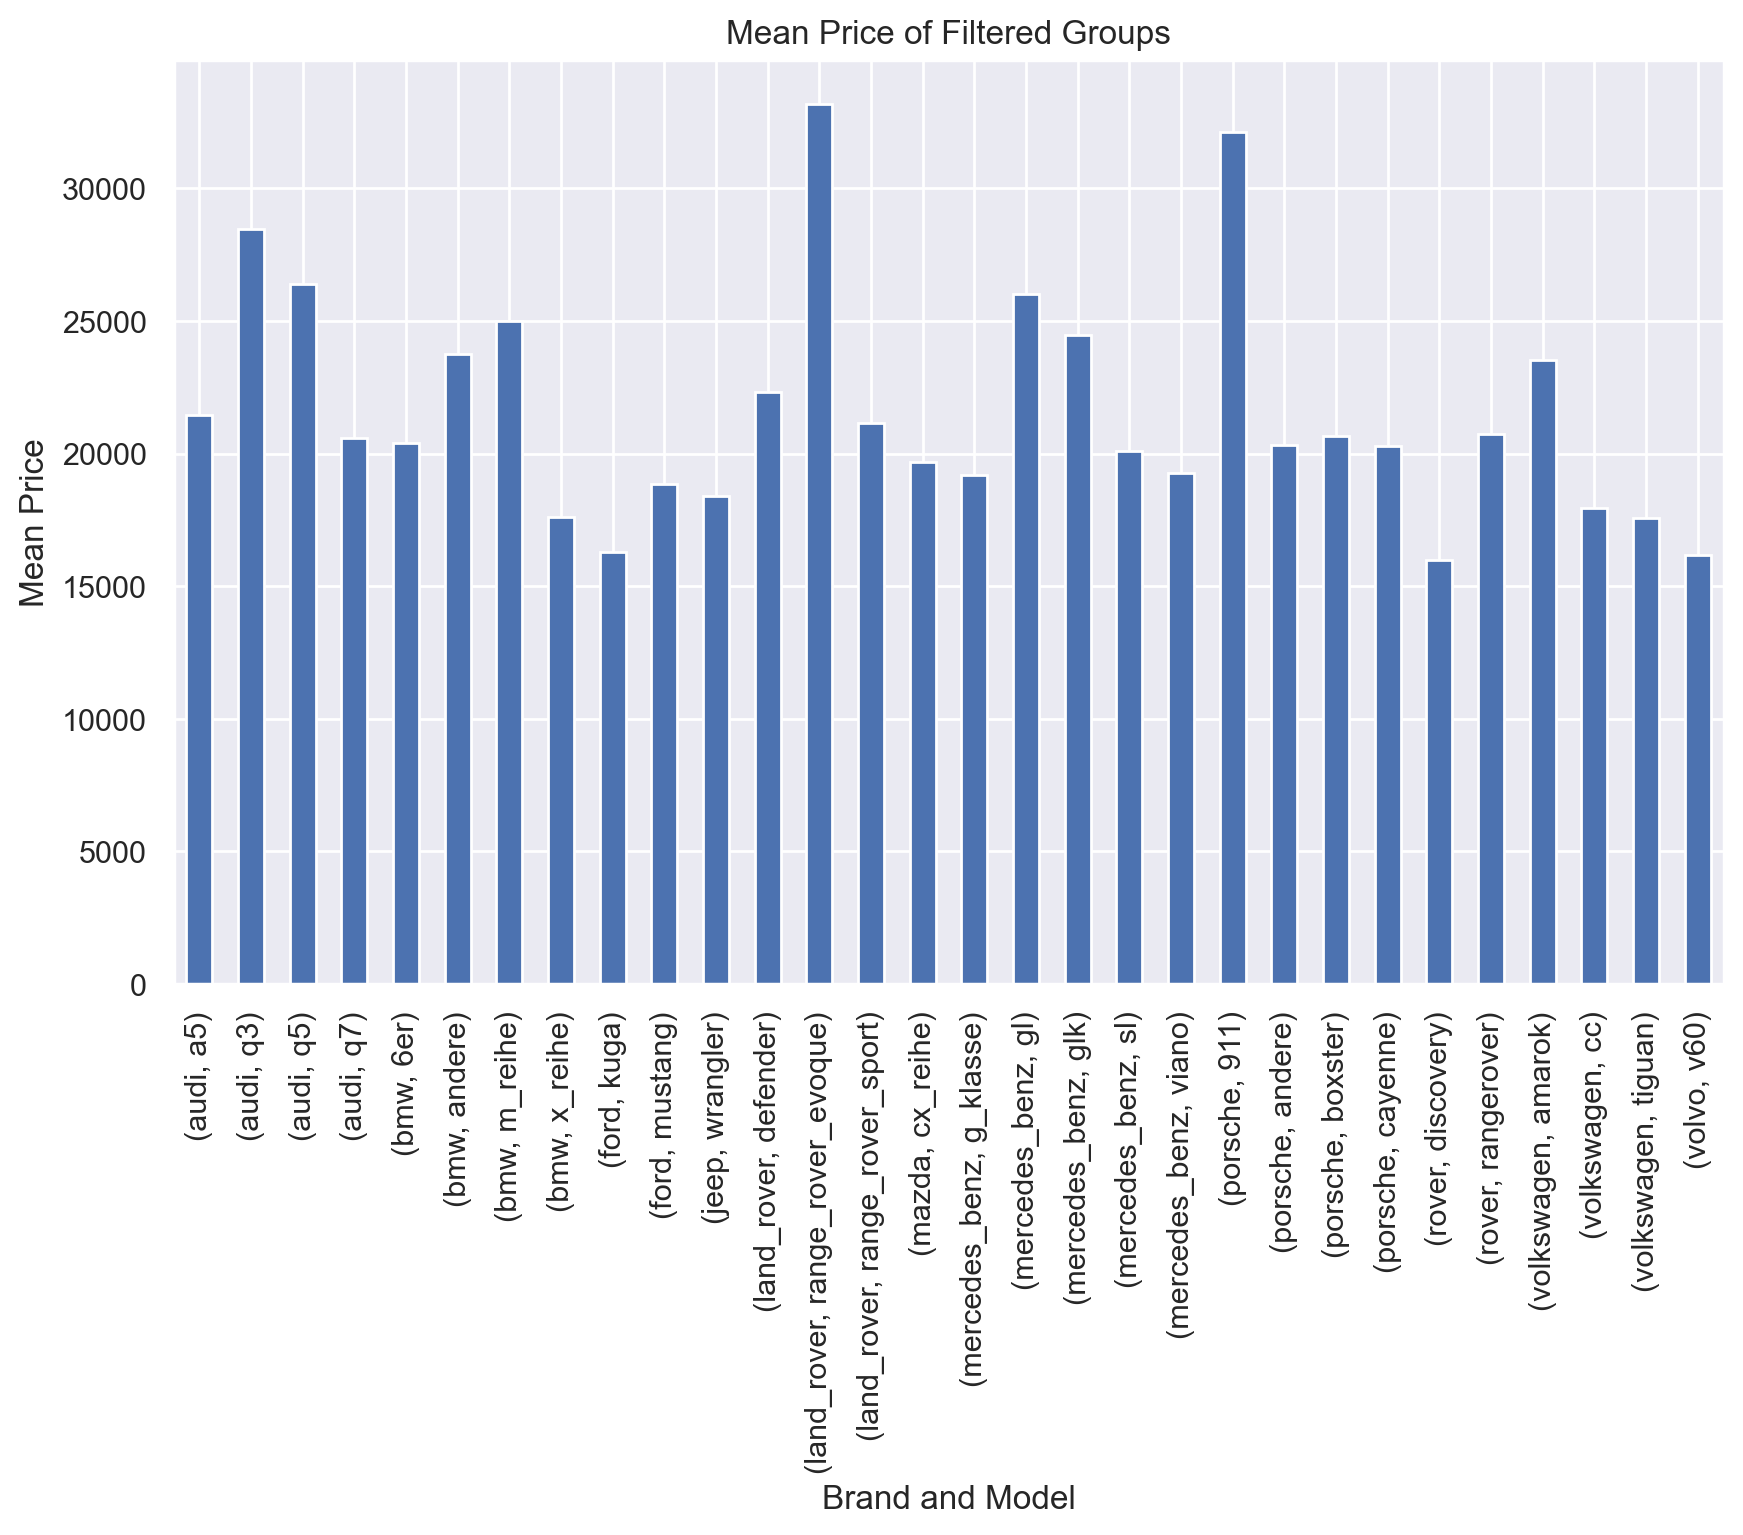

In [22]:
mean_prices = groups_filtered.groupby(['brand', 'model'])['price'].mean()

# create a bar chart of mean prices
mean_prices.plot(kind='bar', figsize=(10,6))
plt.xlabel('Brand and Model')
plt.ylabel('Mean Price')
plt.title('Mean Price of Filtered Groups')
plt.show()

Созданим отдельный признак для самых дорогих конфигураций.

In [23]:
brand_model = groups_filtered['brand'] + groups_filtered['model']
brand_model.unique()

array(['bmwandere', 'mercedes_benzglk', 'fordmustang', 'porscheandere',
       'volkswagentiguan', 'bmw6er', 'bmwx_reihe', 'audia5',
       'mercedes_benzviano', 'mercedes_benzsl', 'audiq5',
       'porscheboxster', 'fordkuga', 'bmwm_reihe', 'volkswagencc',
       'porsche911', 'mazdacx_reihe', 'porschecayenne', 'jeepwrangler',
       'land_roverrange_rover_evoque', 'audiq7', 'audiq3',
       'land_roverdefender', 'mercedes_benzg_klasse', 'roverdiscovery',
       'land_roverrange_rover_sport', 'mercedes_benzgl',
       'volkswagenamarok', 'volvov60', 'roverrangerover'], dtype=object)

In [24]:
data['brand_model'] = data['brand'] + data['model']

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237289 entries, 0 to 241189
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   brand              237289 non-null  object 
 1   model              237289 non-null  object 
 2   vehicleType        237289 non-null  object 
 3   gearbox            237289 non-null  object 
 4   fuelType           237289 non-null  object 
 5   notRepairedDamage  237289 non-null  object 
 6   powerPS            237289 non-null  int64  
 7   kilometer          237289 non-null  int64  
 8   autoAgeMonths      237289 non-null  int64  
 9   price              237289 non-null  int64  
 10  logPrice           237289 non-null  float64
 11  brand_model        237289 non-null  object 
dtypes: float64(1), int64(4), object(7)
memory usage: 23.5+ MB


In [26]:
x = 'bmwandere'
np.isin(x, brand_model)

array(True)

In [27]:
%time data['high_price_brand_model'] = np.isin(data['brand_model'], brand_model)

CPU times: total: 28 s
Wall time: 28.4 s


In [28]:
data[data['high_price_brand_model'] == True]

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price,logPrice,brand_model,high_price_brand_model
26,bmw,andere,coupe,automatik,benzin,nein,306,30000,21,39600,10.586610,bmwandere,True
81,mercedes_benz,glk,suv,automatik,diesel,nein,204,40000,19,41900,10.643065,mercedes_benzglk,True
95,ford,mustang,cabrio,manuell,benzin,nein,305,50000,116,19750,9.890959,fordmustang,True
106,ford,mustang,coupe,automatik,benzin,nein,305,90000,569,25000,10.126671,fordmustang,True
152,porsche,andere,coupe,manuell,benzin,nein,265,125000,82,25900,10.162037,porscheandere,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241059,bmw,x_reihe,suv,automatik,diesel,nein,235,100000,98,23500,10.064798,bmwx_reihe,True
241089,mazda,cx_reihe,suv,automatik,diesel,nein,175,10000,7,32900,10.401258,mazdacx_reihe,True
241139,bmw,andere,coupe,manuell,benzin,ja,200,150000,514,16500,9.711176,bmwandere,True
241166,porsche,andere,cabrio,manuell,benzin,nein,211,150000,297,12800,9.457279,porscheandere,True


### VehicleType

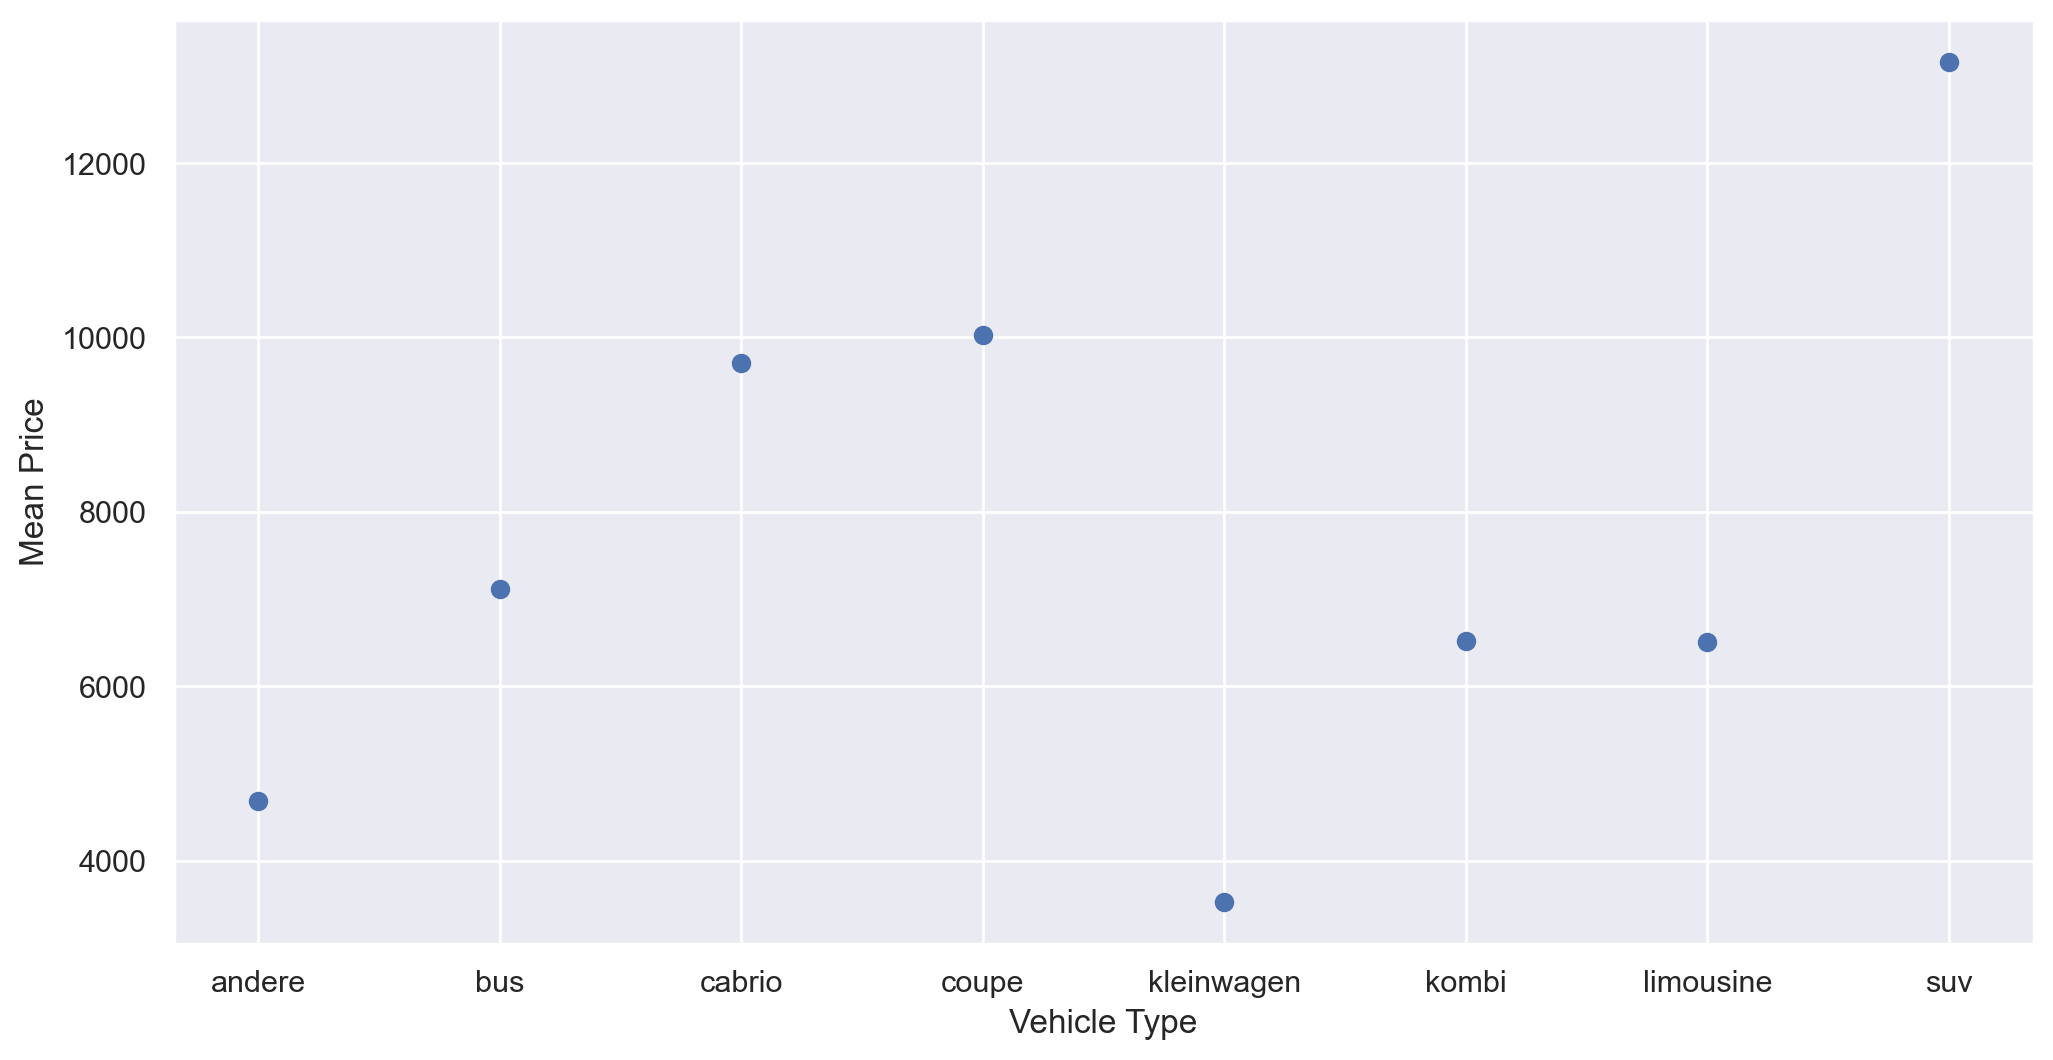

In [29]:
# group by vehicleType and calculate mean price
mean_prices = data.groupby('vehicleType')['price'].mean()

# create scatter plot
plt.scatter(mean_prices.index, mean_prices.values)
plt.xlabel('Vehicle Type')
plt.ylabel('Mean Price')
plt.show()

Всего 8 типов vihicle, поэтому, в дальнейшем, просто закодируем эту feature через OneHotEncoder

### GearBox

<AxesSubplot:xlabel='gearbox', ylabel='price'>

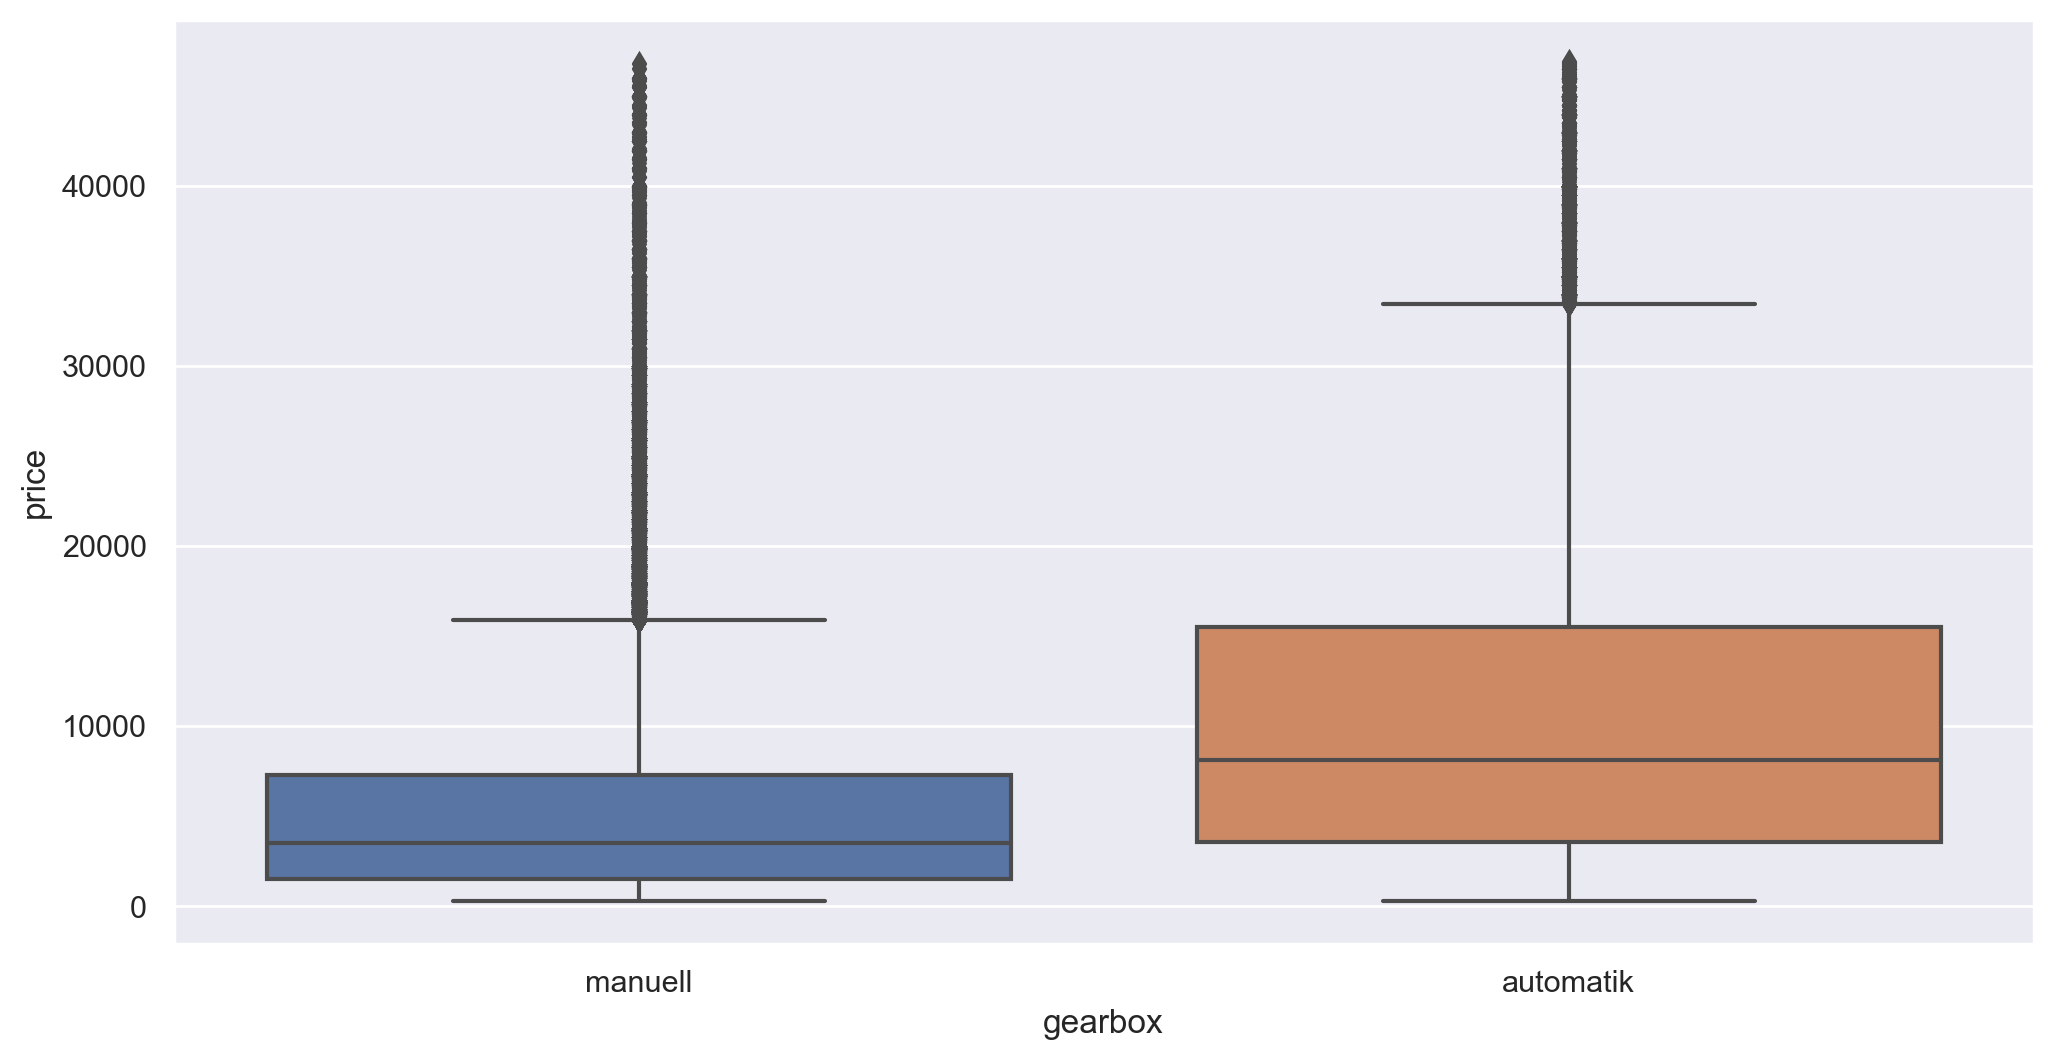

In [30]:
sns.boxplot(x="gearbox", y="price", data=data)

### FuelType

<AxesSubplot:xlabel='fuelType', ylabel='price'>

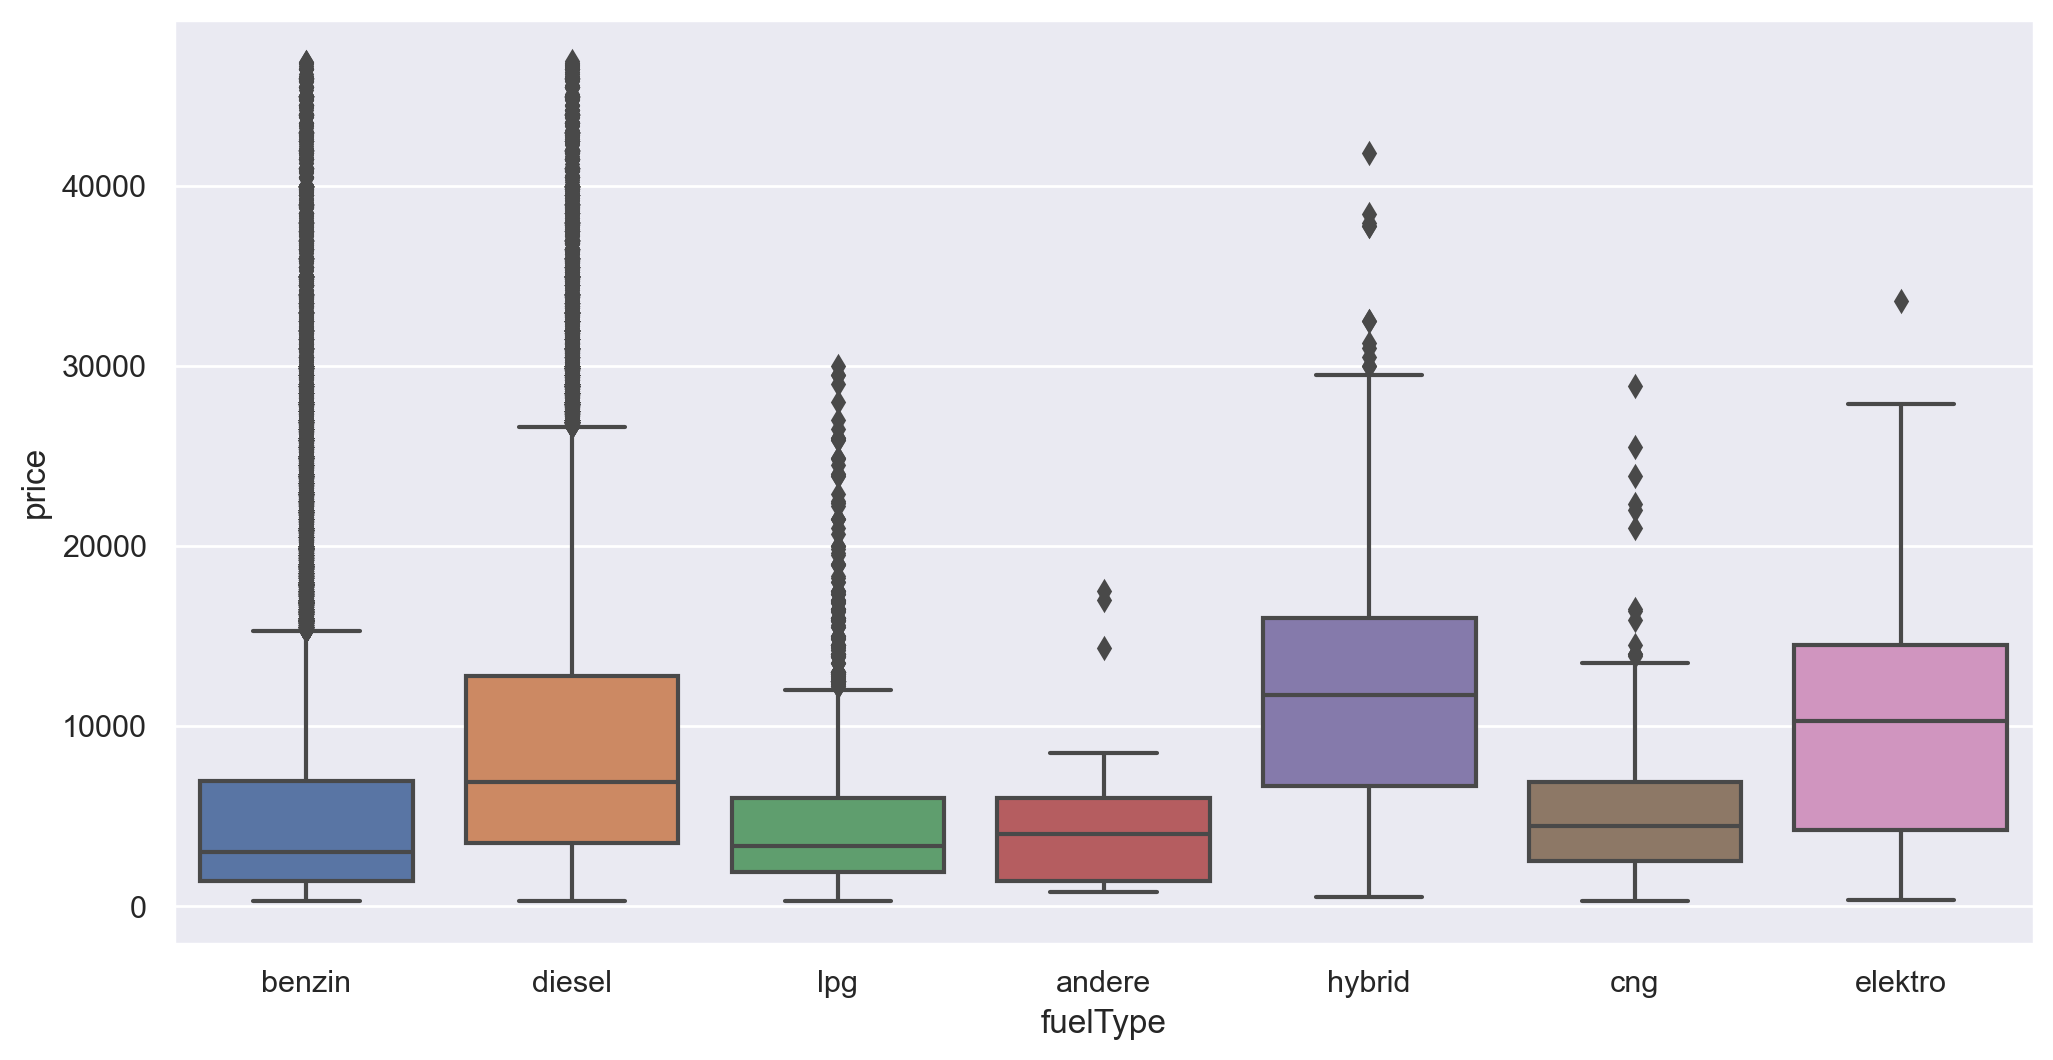

In [31]:
sns.boxplot(x="fuelType", y="price", data=data)

### NotRepairedDamage

<AxesSubplot:xlabel='notRepairedDamage', ylabel='price'>

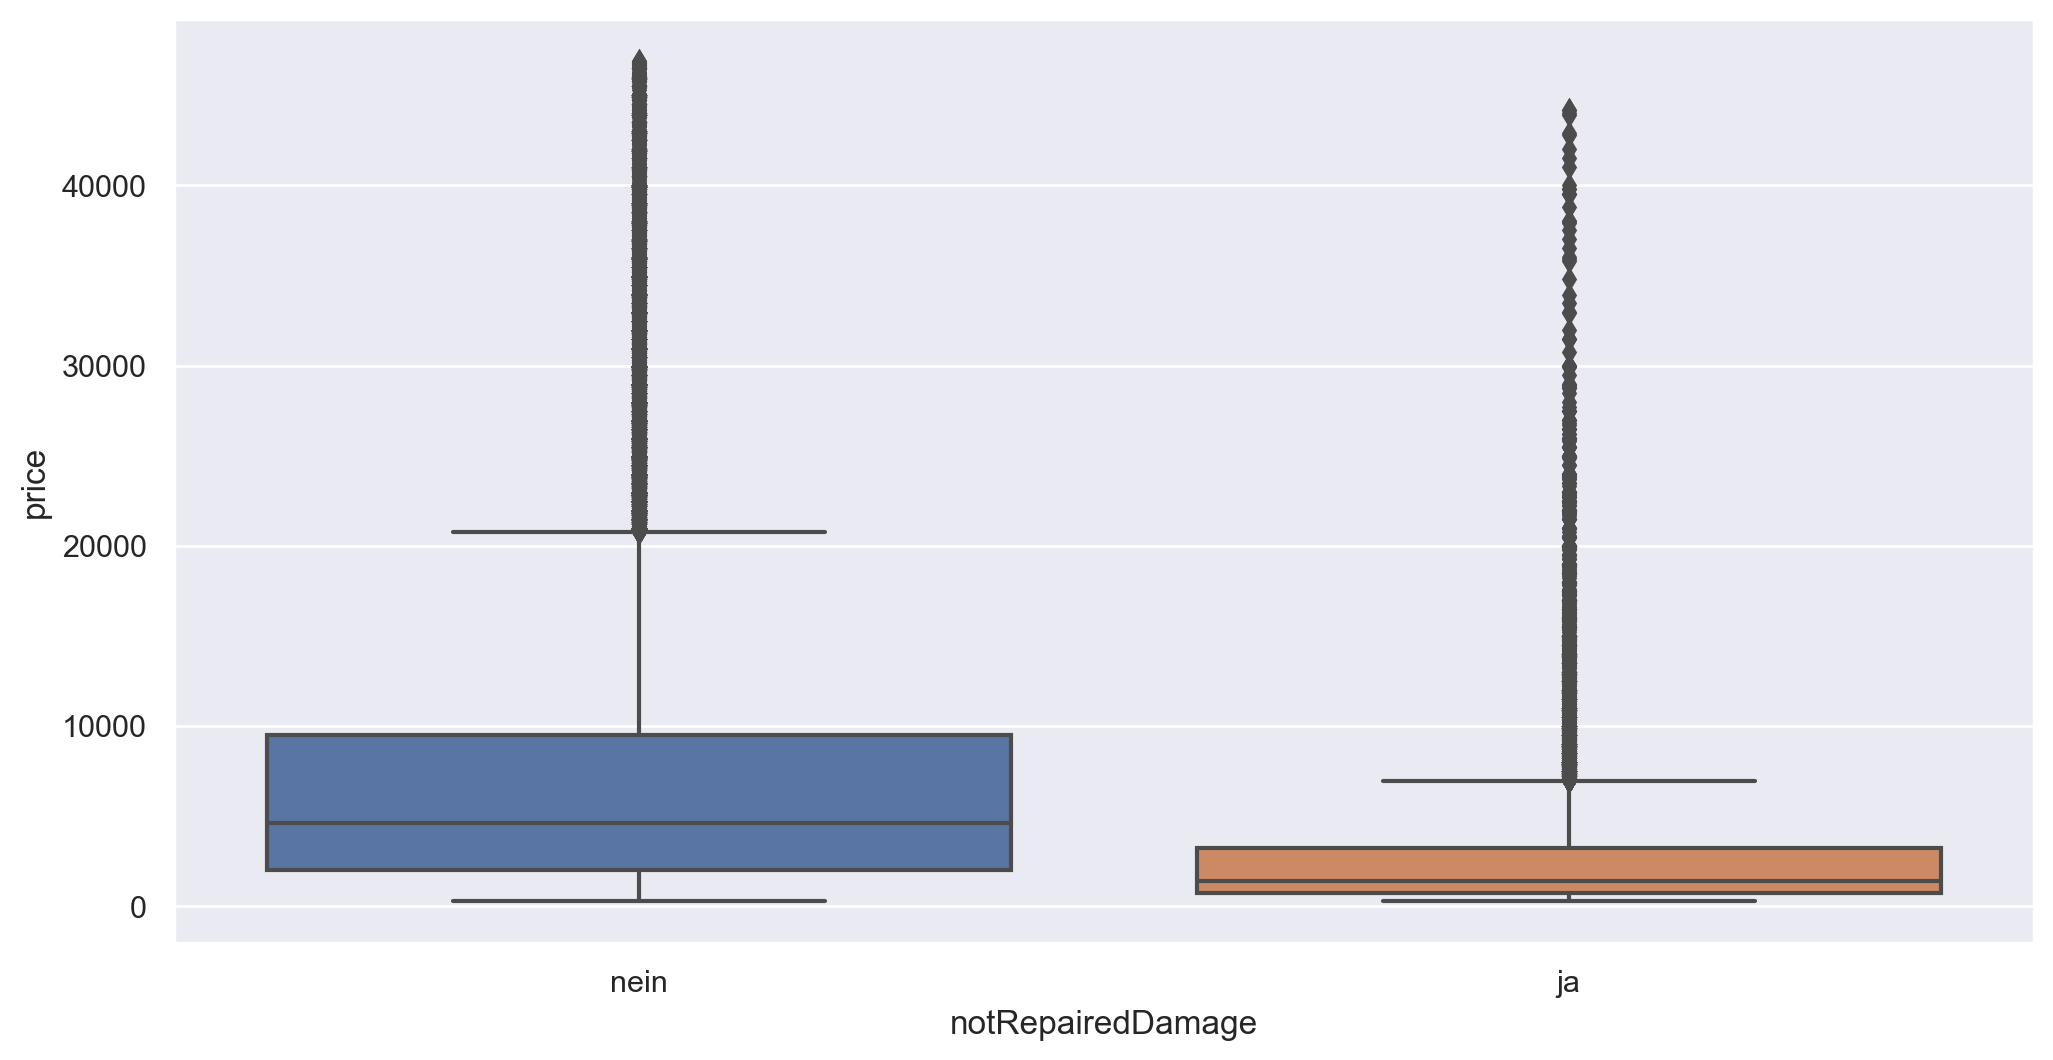

In [32]:
sns.boxplot(x="notRepairedDamage", y="price", data=data)

### PowerPS

<AxesSubplot:xlabel='powerPS', ylabel='price'>

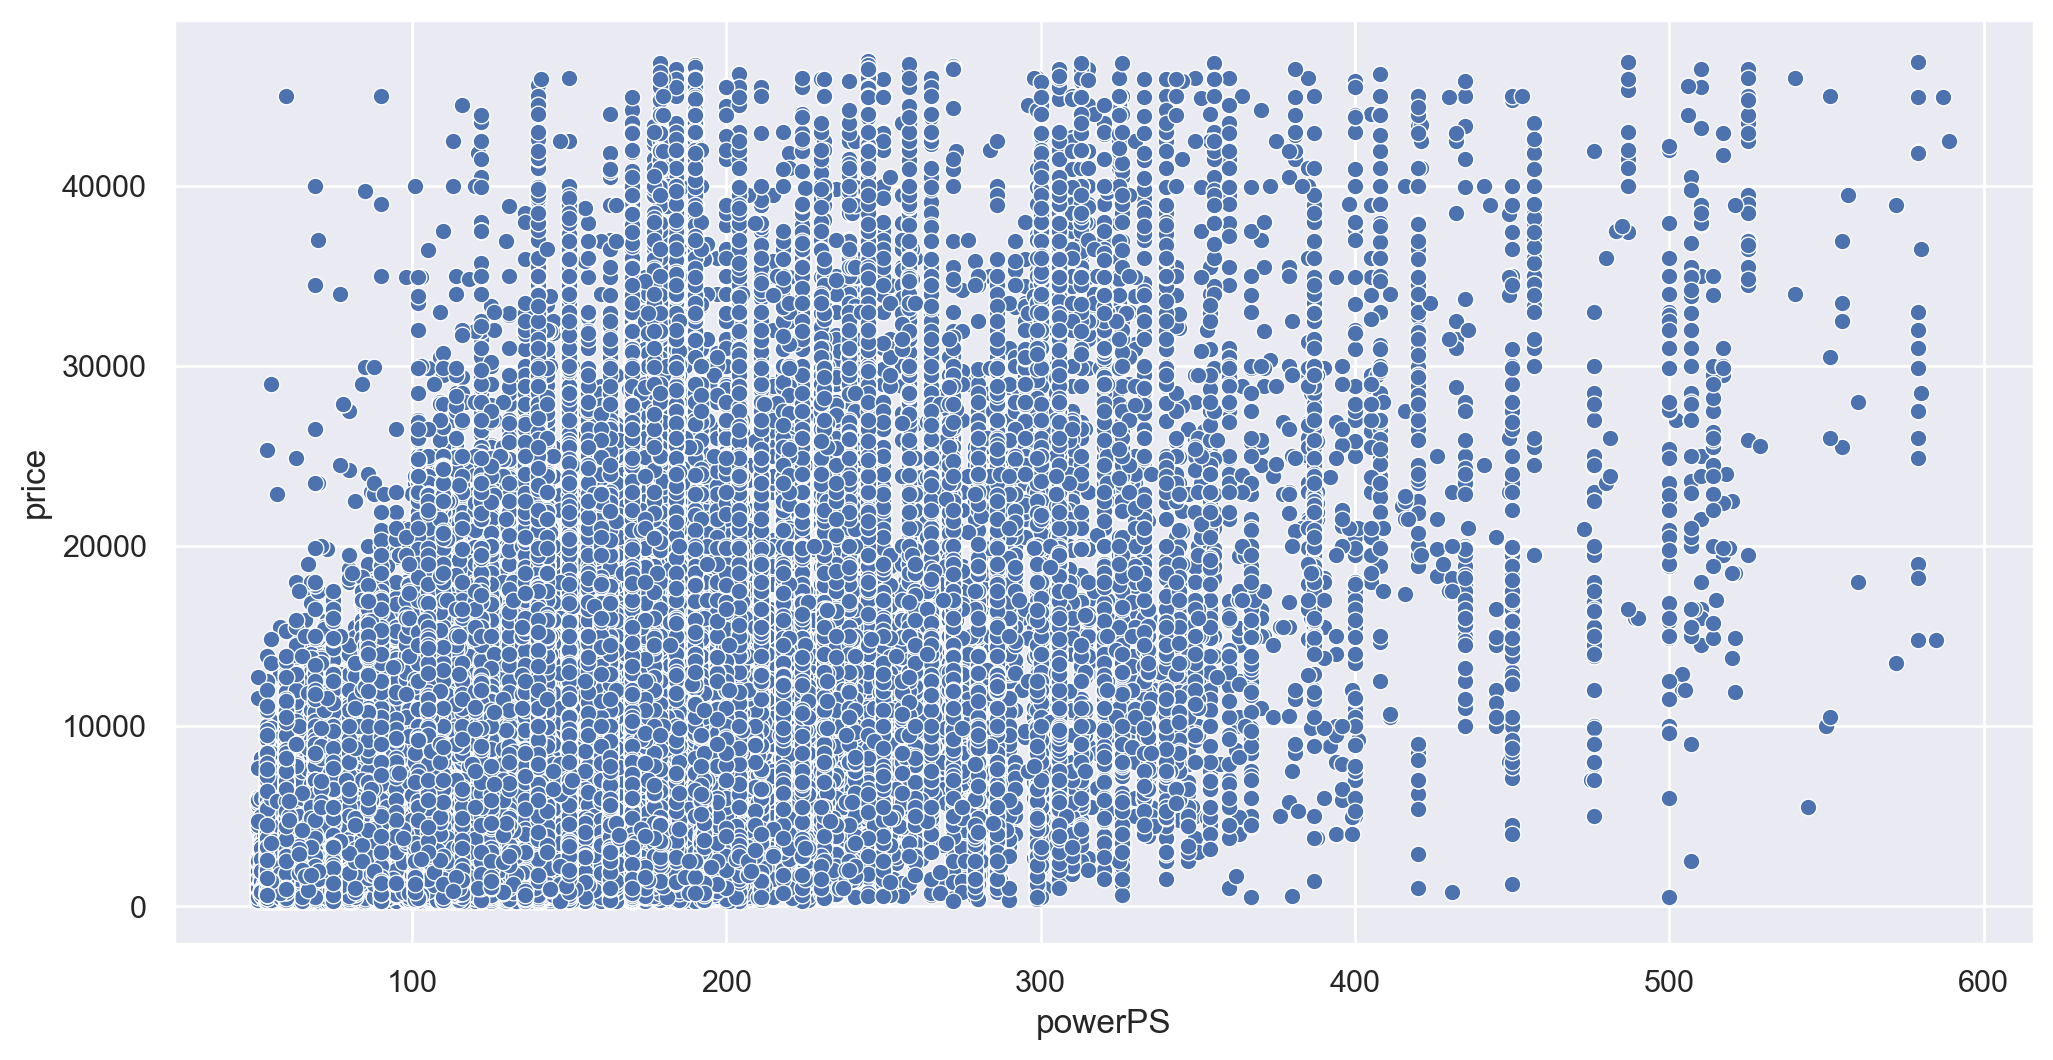

In [33]:
#sns.regplot(x="powerPS", y="price", line_kws={'color': 'red'}, data=data)
sns.scatterplot(x="powerPS", y="price", data=data)

### Kilometer

Зависимость среднего значения цены машин в зависимости от километрожа практически ленейное

<AxesSubplot:xlabel='kilometer', ylabel='price'>

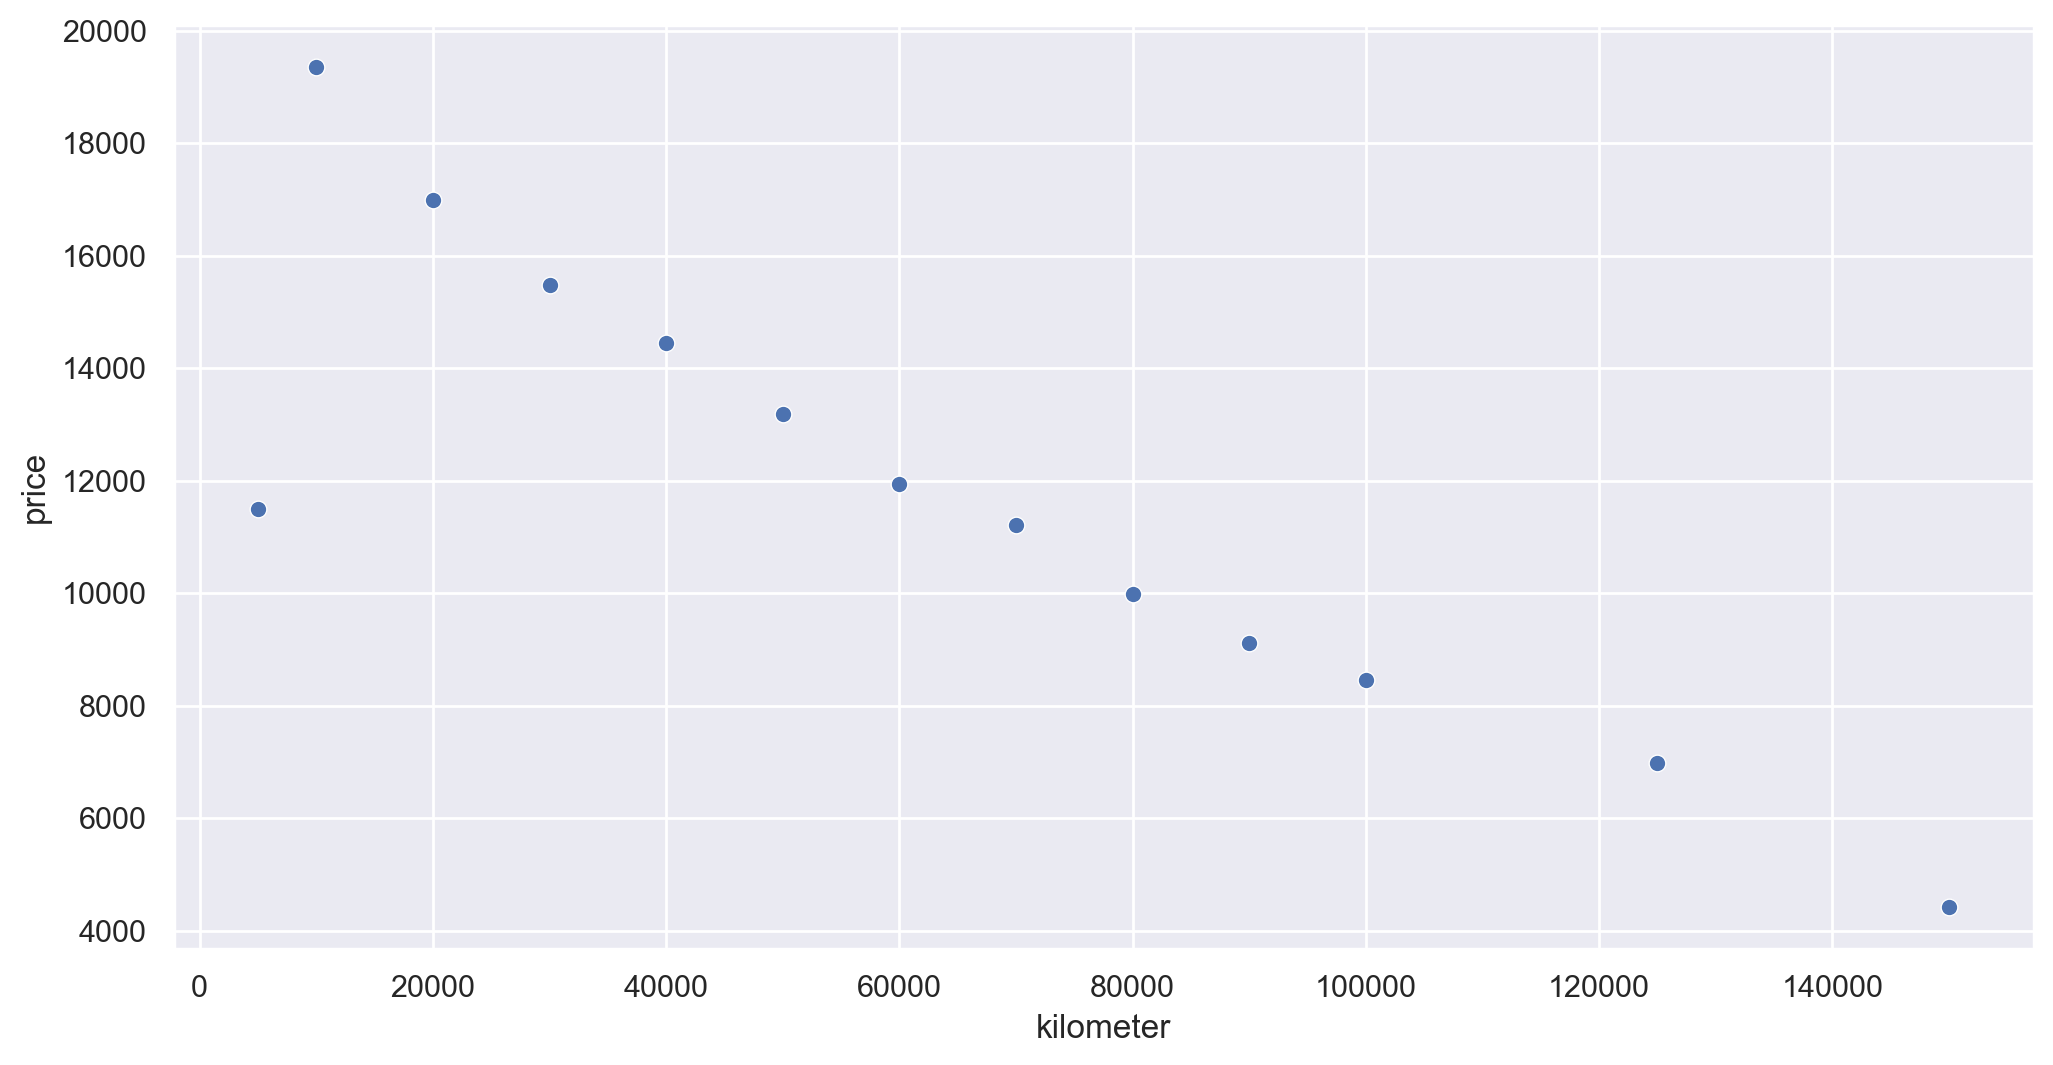

In [34]:
kilometr = data.groupby('kilometer').mean()
sns.scatterplot(x='kilometer', y="price", data=kilometr)

### AutoAgeMonths

<AxesSubplot:xlabel='autoAgeMonths', ylabel='price'>

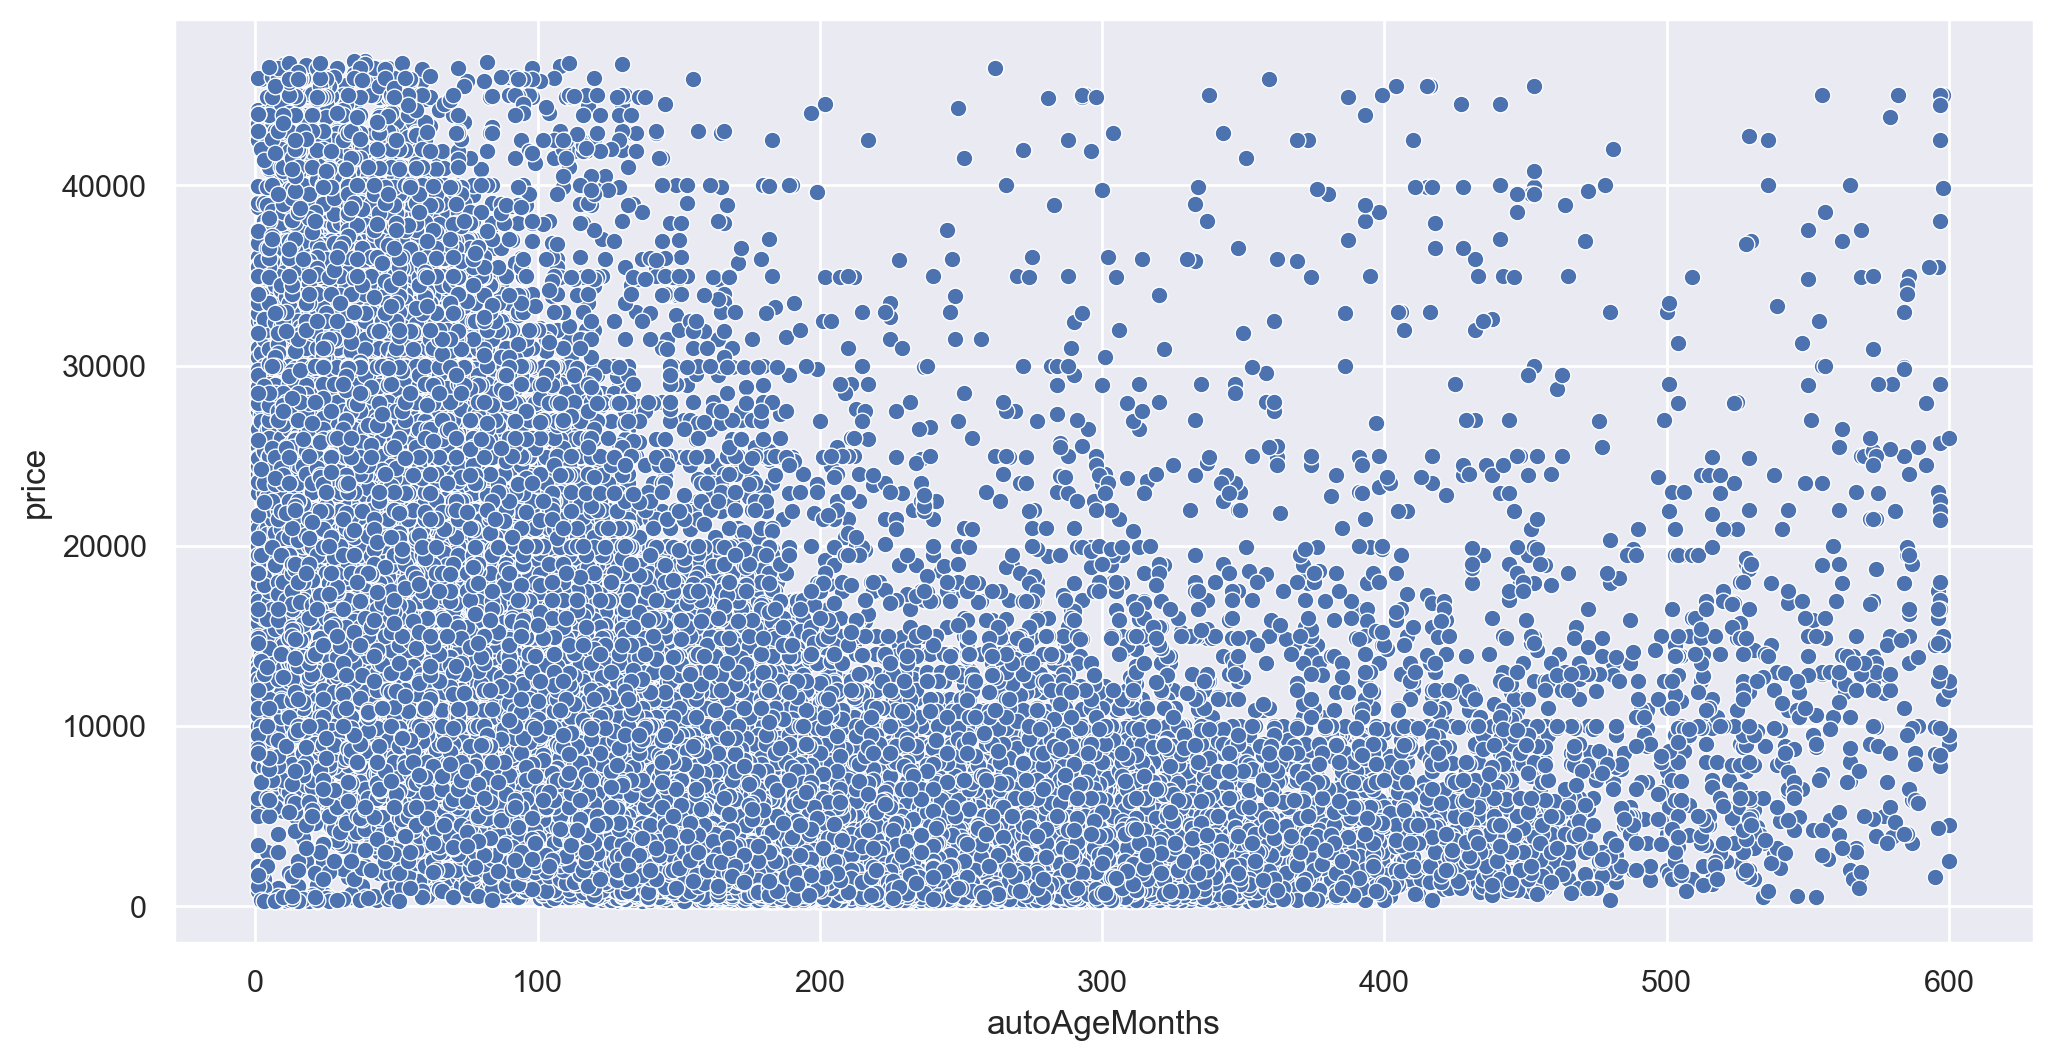

In [35]:
sns.scatterplot(x="autoAgeMonths", y="price", data=data)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237289 entries, 0 to 241189
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   brand                   237289 non-null  object 
 1   model                   237289 non-null  object 
 2   vehicleType             237289 non-null  object 
 3   gearbox                 237289 non-null  object 
 4   fuelType                237289 non-null  object 
 5   notRepairedDamage       237289 non-null  object 
 6   powerPS                 237289 non-null  int64  
 7   kilometer               237289 non-null  int64  
 8   autoAgeMonths           237289 non-null  int64  
 9   price                   237289 non-null  int64  
 10  logPrice                237289 non-null  float64
 11  brand_model             237289 non-null  object 
 12  high_price_brand_model  237289 non-null  bool   
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 31.8+ MB


In [37]:
data['high_price_brand_model'] = data['high_price_brand_model'].astype(int)

In [38]:
categorical = ['vehicleType', 'gearbox', 'notRepairedDamage', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['high_price_brand_model']

In [39]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['logPrice']

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [41]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.111, random_state=42) 

In [42]:
y_train = y_train.values
y_test = y_test.values
y_val = y_val.values

In [43]:
print(x_train.dtype)
print(y_train.dtype)

float64
float64


## Сравнение методов градиентного спуска


### Подбор оптимальной длины шага

Подберем по train  выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделаем перебор по логарифмической сетке. Для каждого метода посчитаем ошибку на обучающей и тестовой выборках, посчитаем качество по метрике $R^2$, сохраним количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставим равным значениям по умолчанию.

In [44]:
dimension = x.shape[1]

descent_config = {
    'descent_name': descent_name,
    'kwargs': {
        'dimension': dimension
    }
}
dimension

24

In [45]:
%%time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

gradients = ['full', 'stochastic', 'momentum', 'adam']
lambdas = np.logspace(-3, 0.05, 20)

lambda_list = []
best_lambda = {}
R_2_list_train = []
R_2_list_val = []
R_2_list_test = []
mse_list_train = []
mse_list_val = []
mse_list_test = []
res = pd.DataFrame()

for grad in gradients:
    descent_config['descent_name'] = grad
    for lamb in lambdas:
        descent_config['kwargs']['lambda_'] = lamb
        lambda_list.append(lamb)
        #обучаемся
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(x_train, y_train)
        
        #делаем предсказания
        y_pred_train = regression.predict(x_train)
        y_pred_val = regression.predict(x_val)
        y_pred_test = regression.predict(x_test)
        
        mse_list_train.append(mean_squared_error(y_train, y_pred_train))
        mse_list_val.append(mean_squared_error(y_val, y_pred_val))
        mse_list_test.append(mean_squared_error(y_test, y_pred_test))
        
        #считаем качество
        R_2_list_train.append(r2_score(y_train, y_pred_train))
        R_2_list_val.append(r2_score(y_val, y_pred_val))
        R_2_list_test.append(r2_score(y_test, y_pred_test))
        
    best_lambda[grad] = [lambda_list[np.argmax(R_2_list_val)]]
    to_insert = {
            "Gradient": [grad],
            "mse_train": [mse_list_train[np.argmax(R_2_list_val)]],
            "mse_val": [mse_list_val[np.argmax(R_2_list_val)]],
            "mse_test": [mse_list_test[np.argmax(R_2_list_val)]],
            "R_2_train": [R_2_list_train[np.argmax(R_2_list_val)]],
            "R_2_val": [np.amax(R_2_list_val)],
            "R_2_test": [R_2_list_test[np.argmax(R_2_list_val)]],
            "steps": [len(regression.loss_history)],
            "lambda":  best_lambda[grad]
        }
        
    res = pd.concat([res, pd.DataFrame(to_insert)], ignore_index=True)
    R_2_list_val.clear()
    R_2_list_test.clear()

    
res.head()

CPU times: total: 2min 58s
Wall time: 1min


,Gradient,mse_train,mse_val,mse_test,R_2_train,R_2_val,R_2_test,steps,lambda
0,full,0.325683,0.320986,0.320310,0.715128,0.717576,0.720466,35,0.775307
1,stochastic,0.346931,0.343969,0.340926,0.696544,0.723979,0.724332,301,0.535732
2,momentum,0.325683,0.320986,0.320310,0.715128,0.728705,0.730319,122,0.775307
3,adam,0.346931,0.343969,0.340926,0.696544,0.734989,0.737155,68,0.535732


### Сравнение методов

Построим график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

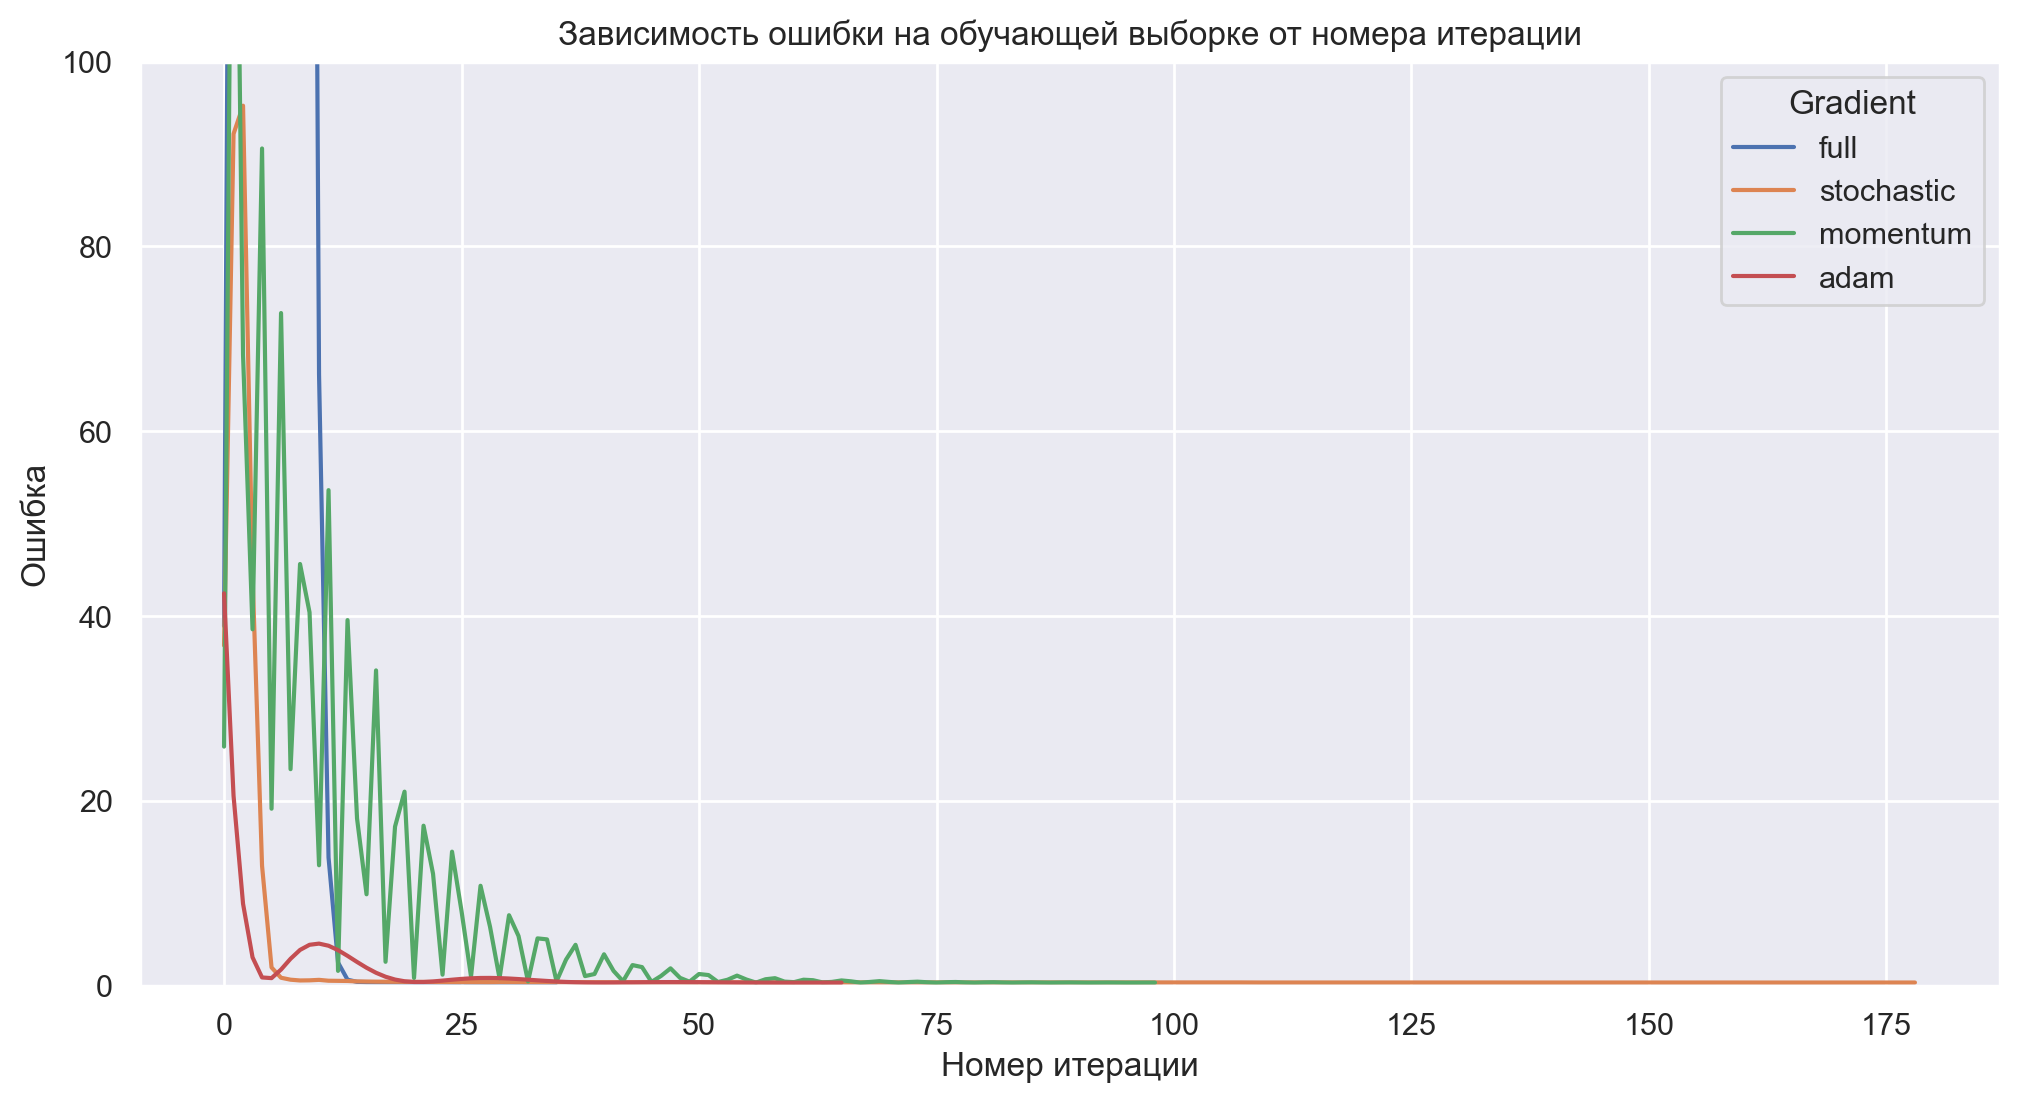

In [75]:
regression_graph = pd.DataFrame()

for grad,lamb in best_lambda.items():
    descent_config = {
    'descent_name': grad,
    'kwargs': {
        'dimension': dimension,
        'lambda_': float(lamb[0])
        }
    }
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(x_train, y_train)
    to_insert = {
            "Gradient": [grad for i in range(len(regression.loss_history))],
            "Loss_history": regression.loss_history
        }
    regression_graph = pd.concat([regression_graph, pd.DataFrame(to_insert)], ignore_index=True)
    plt.plot(np.arange(0, len(regression.loss_history)), regression.loss_history, label=grad)
    
    
plt.legend(title='Gradient')
plt.title('Зависимость ошибки на обучающей выборке от номера итерации')   

plt.ylabel('Ошибка')
plt.xlabel('Номер итерации')

plt.ylim(0,100)

plt.show()

**Из графика видно, поведение градиентных спусков соответсвует их свойсвам:**
+ **Full и Stochastic**: 
    Full градиенту потребовалось меньше всего шагов для сходимости, что видно из steps (на графике это заметить сложно из-за большого масштаба), а stochastic наоборот, достиг предела по количесву шагов.
+ **Momentum**: 
    У momentum градиента значение ошибки колеблется вверз и вниз, но в конечном итоге колебания уменьшаются и мы сводим ошибку к минимуму.
+ **Adam**: ошибка падает, затем происходит небольшой рост, а затем функция монотонно убывает

## Стохастический градиентный спуск и размер батча

Исследуем влияние размера батча на работу стохастического градиентного спуска. 

* Сделаем по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерим время в секундах и количество итераций до сходимости. Посчитаем среднее этих значений для каждого размера батча.
* Построим график зависимости количества шагов до сходимости от размера батча.
* Построим график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [47]:
%%time
import time
batch_sizes = np.arange(5, 500, 10)
steps = []
duration = []
res = pd.DataFrame()

for batch in batch_sizes:
    descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'lambda_': best_lambda['stochastic'][0],
        'batch_size': batch
        }
    }
    batch_steps = []
    duration_steps = []
    for k in range(10):
        regression = LinearRegression(descent_config=descent_config)
        start_time = time.time()
        regression.fit(x_train, y_train)
        duration_steps.append(time.time() - start_time)
        y_pred_val = regression.predict(x_val)
        batch_steps.append(len(regression.loss_history))
    mean_steps = steps.append(np.mean(batch_steps))
    mean_duration = duration.append(np.mean(duration_steps))
    to_insert = {
            'batch_size': [batch],
            'mean_steps': [np.mean(batch_steps)],
            'duration': [np.mean(duration_steps)]
        }
        
    res = pd.concat([res, pd.DataFrame(to_insert)], ignore_index=True)
    
res.head(10)
    

CPU times: total: 15min 32s
Wall time: 7min 2s


,batch_size,mean_steps,duration
0,5,212.8,2.121084
1,15,249.3,2.444009
2,25,230.5,2.288490
3,35,177.9,1.752867
4,45,151.7,1.486000
5,55,157.6,1.545134
6,65,130.1,1.299468
7,75,122.5,1.239307
8,85,114.2,1.120335
9,95,101.0,0.997878


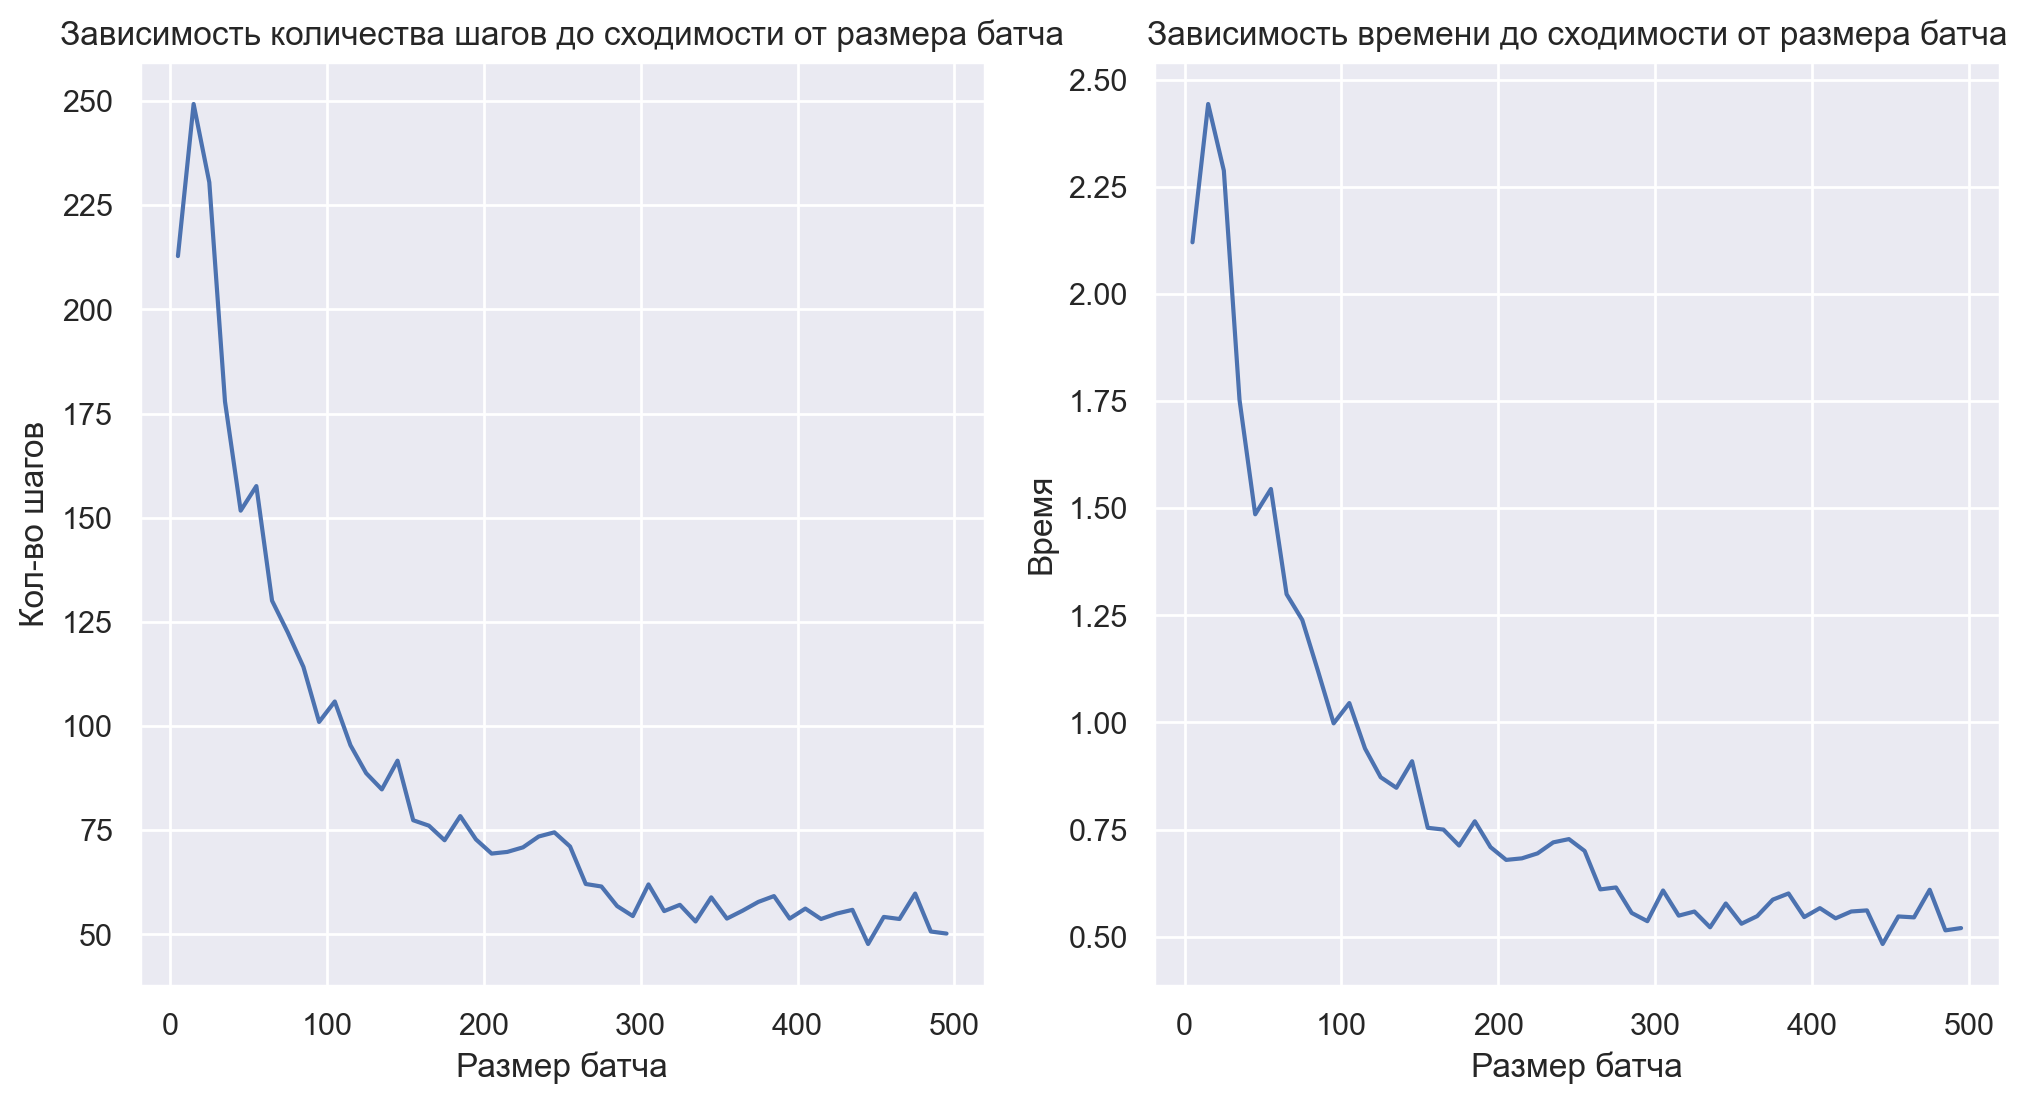

In [48]:
plt.subplot(1,2,1)
plt.plot(res.batch_size, res.mean_steps)
plt.title('Зависимость количества шагов до сходимости от размера батча')
plt.ylabel('Кол-во шагов')
plt.xlabel('Размер батча')

plt.subplot(1,2,2)
plt.plot(res.batch_size, res.duration)
plt.title('Зависимость времени до сходимости от размера батча')
plt.ylabel('Время')
plt.xlabel('Размер батча')

plt.show()

**Чем больше размер батча, тем меньше нужно шагов до сходимости и, следовательно, меньше времени до сходимости**

## Регуляризация

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Класс **BaseDescentReg** в файле `descents.py`.



Найдем лучшие параметры обучения с регуляризацией. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

* Сравним для каждого метода результаты с регуляризацией и без регуляризации.

* !! Построим для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации).

Посмотриv на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке?

In [62]:
dimension = x.shape[1]

descent_config = {
    'descent_name': descent_name,
    'regularized': True,
    'kwargs': {
        'dimension': dimension,
        'mu' : float(0)
    }
}

In [68]:
gradients = ['full', 'stochastic', 'momentum', 'adam']
# gradients = ['full']
lambdas = np.logspace(-3, 0.05, 1)
mus = np.logspace(-3, 1, 1)

lambda_list = []
mus_list = []
best_lambda_reg = {}
R_2_list_train = []
R_2_list_val = []
R_2_list_test = []
mse_list_train = []
mse_list_val = []
mse_list_test = []
res_reg = pd.DataFrame()
regular = pd.DataFrame()


for grad in gradients:
    descent_config['descent_name'] = grad
    for mu in mus:
        descent_config['kwargs']['mu'] = mu
        mus_list.append(mu)
        for lamb in lambdas:
            descent_config['kwargs']['lambda_'] = lamb
            lambda_list.append(lamb)
            #обучаемся
            regression_reg = LinearRegression(descent_config=descent_config)
            regression_reg.fit(x_train, y_train)
            #делаем предсказания
            y_pred_train = regression_reg.predict(x_train)
            y_pred_val = regression_reg.predict(x_val)
            y_pred_test = regression_reg.predict(x_test)

            mse_list_train.append(mean_squared_error(y_train, y_pred_train))
            mse_list_val.append(mean_squared_error(y_val, y_pred_val))
            mse_list_test.append(mean_squared_error(y_test, y_pred_test))
            #считаем качество
            R_2_list_train.append(r2_score(y_train, y_pred_train))
            R_2_list_val.append(r2_score(y_val, y_pred_val))
            R_2_list_test.append(r2_score(y_test, y_pred_test))
        best_lambda_reg[grad] = [lambda_list[np.argmax(R_2_list_val)]]
        
        to_insert = {
                "Gradient": [grad],
                "mu": [mu],
                "mse_train": [mse_list_train[np.argmax(R_2_list_val)]],
                "mse_val": [mse_list_val[np.argmax(R_2_list_val)]],
                "mse_test": [mse_list_test[np.argmax(R_2_list_val)]],
                "R_2_train": [R_2_list_train[np.argmax(R_2_list_val)]],
                "R_2_val": [np.amax(R_2_list_val)],
                "R_2_test": [R_2_list_test[np.argmax(R_2_list_val)]],
                "steps": [len(regression.loss_history)],
                "lambda":  best_lambda_reg[grad]
            }
        
        
        regular = pd.concat([regular, pd.DataFrame(to_insert)], ignore_index=True)
        R_2_list_train.clear()
        R_2_list_val.clear()
        R_2_list_test.clear()
        mse_list_train.clear()
        mse_list_val.clear()
        mse_list_test.clear()
    #выбираем максимум
    insert = regular[regular['R_2_val']==regular['R_2_val'].max()]
    res_reg = pd.concat([res_reg, insert], ignore_index=True)
    regular = pd.DataFrame()
    print(grad)
    
res_reg

full
stochastic
momentum
adam


,Gradient,mu,mse_train,mse_val,mse_test,R_2_train,R_2_val,R_2_test,steps,lambda
0,full,0.001,34.775088,34.956016,35.034504,-29.417382,-29.756597,-29.574529,63,0.001
1,stochastic,0.001,26.763161,26.874237,26.898957,-22.409439,-22.645717,-22.474657,63,0.001
2,momentum,0.001,4.825104,4.861244,4.842311,-3.220465,-3.277241,-3.225874,63,0.001
3,adam,0.001,38.794368,38.976947,39.013931,-32.933001,-33.294476,-33.047366,63,0.001


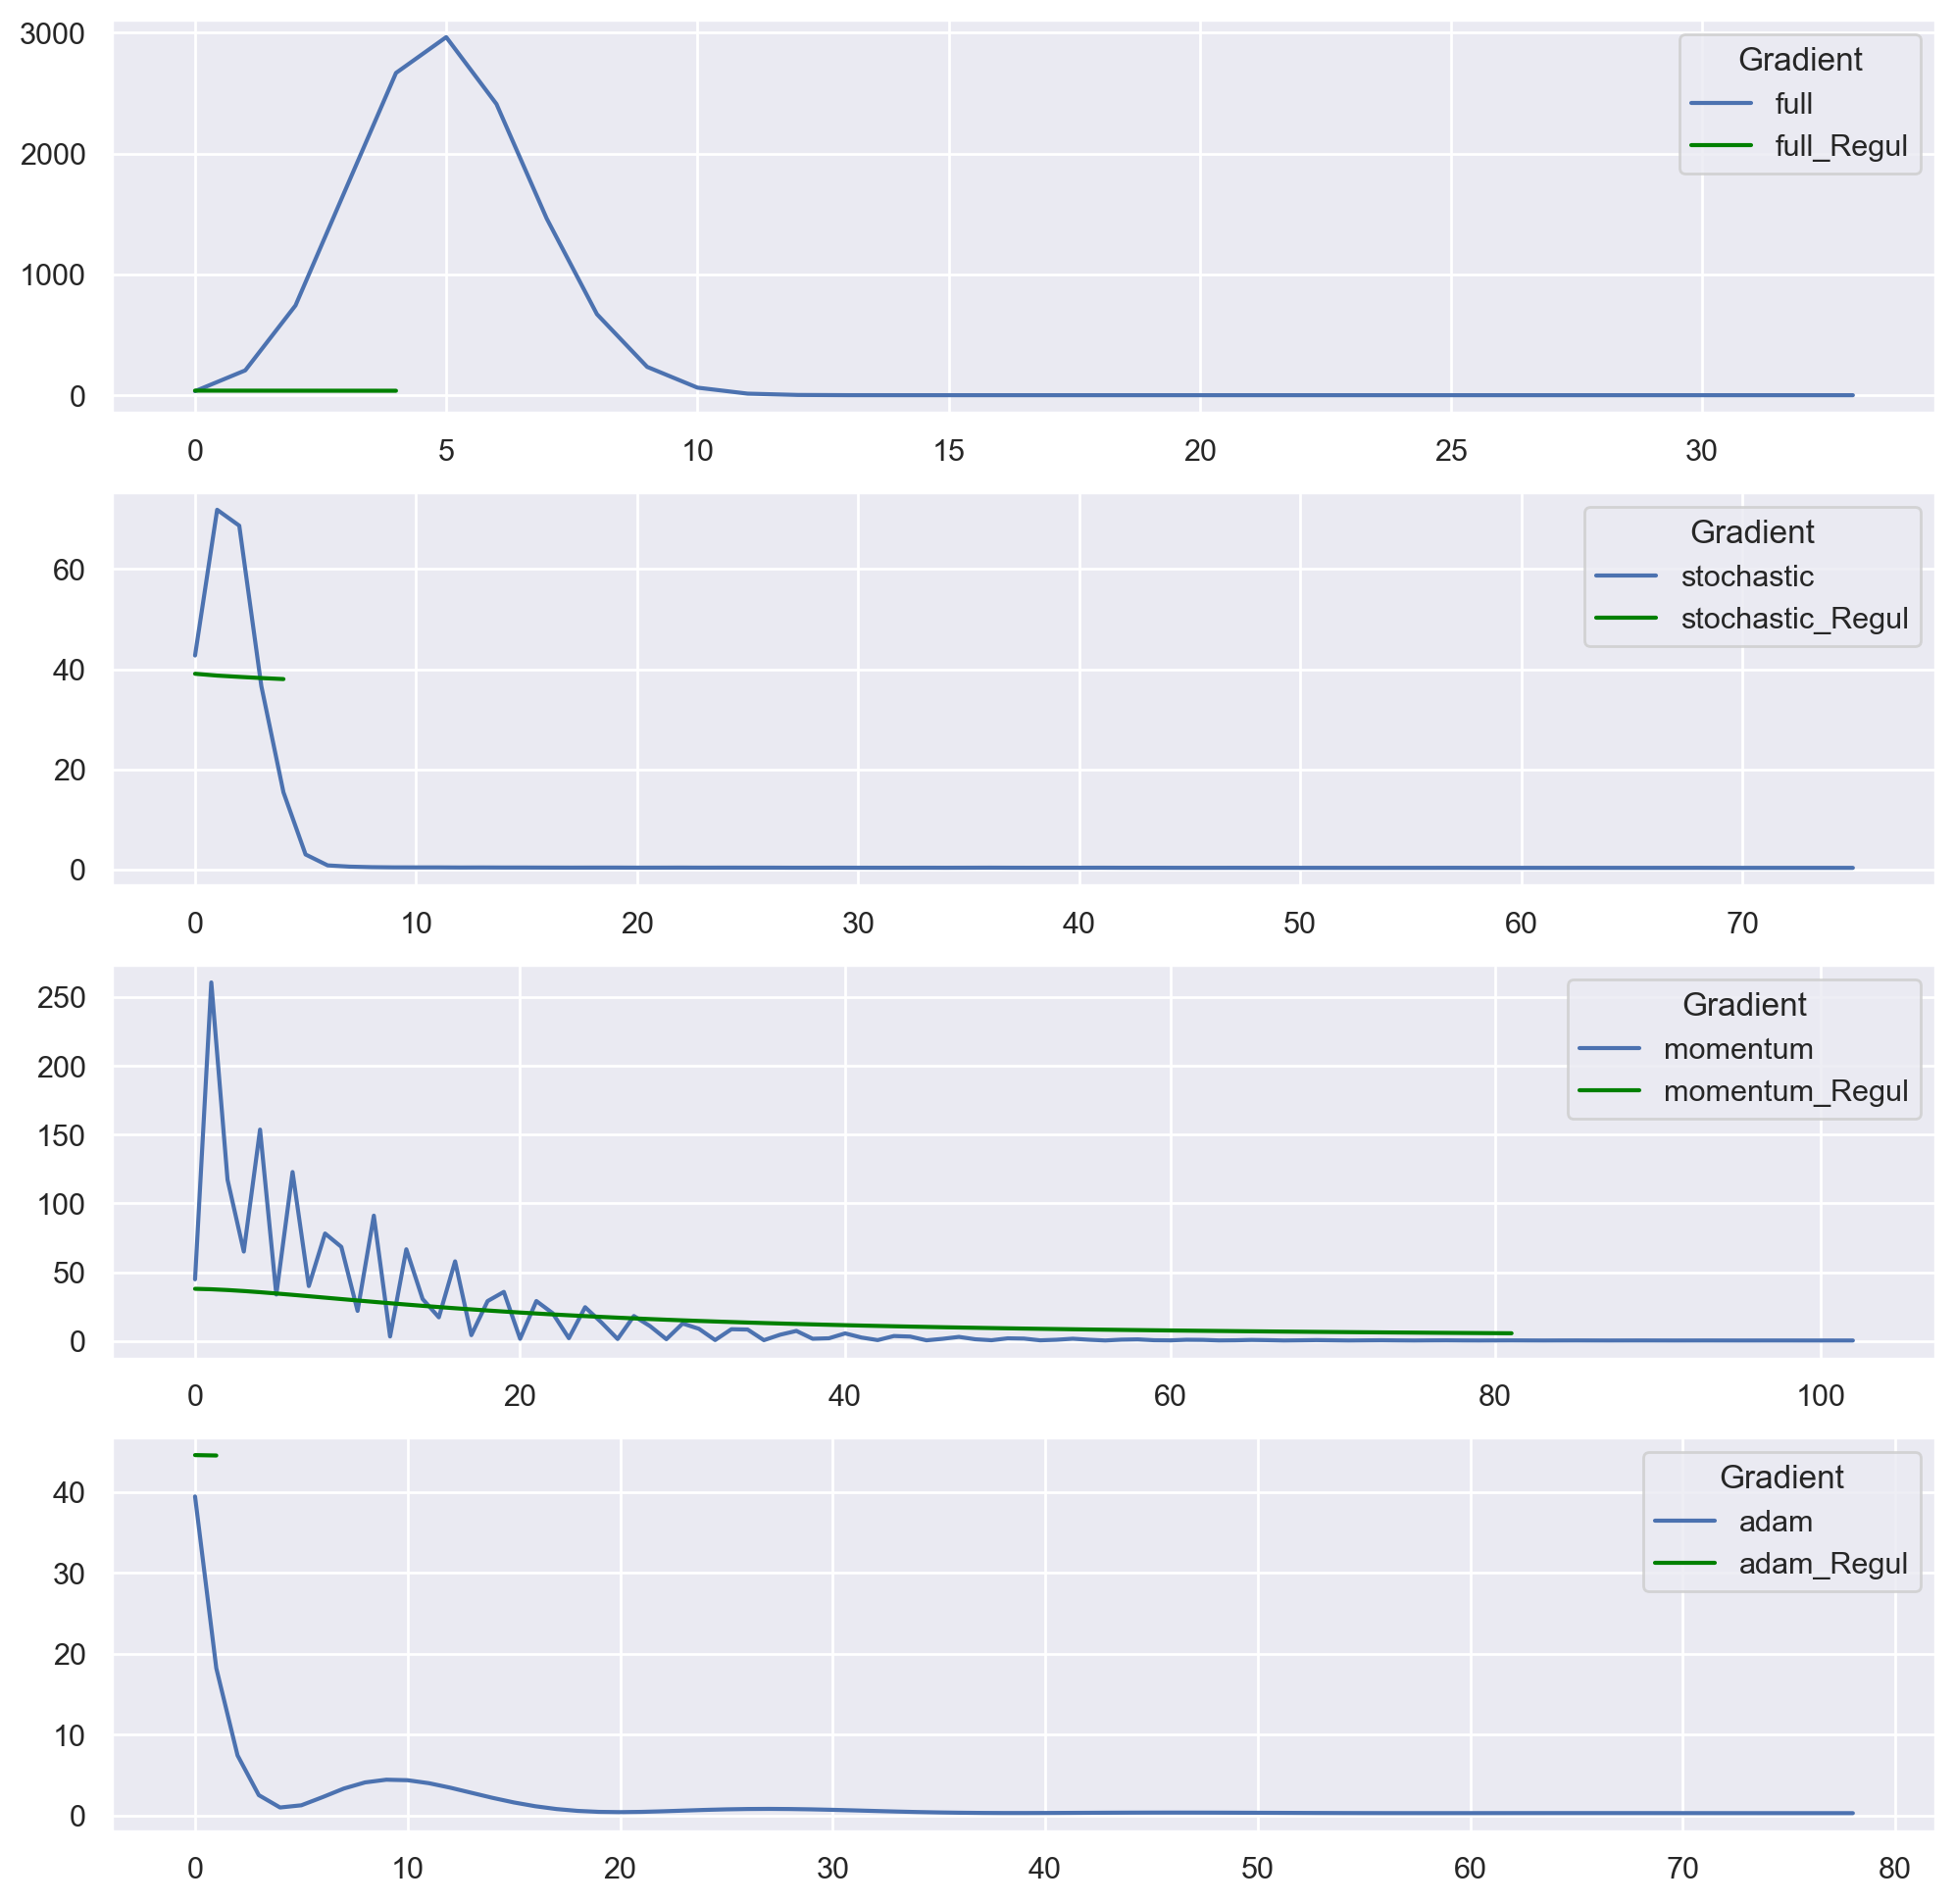

In [88]:
##### VALID
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 12))
axes = [ax1, ax2, ax3, ax4]
for i in range(4):
    grad, lambd = list(best_lambda.items())[i]
    descent_config = {
    'descent_name': grad,
    'kwargs': {
        'dimension': dimension,
        'lambda_': float(lambd[0])
        }
    }
    
    regression = LinearRegression(descent_config=descent_config)
    regression.fit(x_train, y_train)
    
    axes[i].plot(np.arange(0, len(regression.loss_history)), regression.loss_history, label=grad)
    
    
    descent_config_reg = {
    'descent_name': grad,
    'regularized': True,
    'kwargs': {
        'dimension': dimension,
        'lambda_': float(res_reg.iloc[i]['lambda']),
        'mu': float(res_reg.iloc[i]['mu'])
        }
    }
    regression_reg = LinearRegression(descent_config=descent_config_reg)
    regression_reg.fit(x_train, y_train)
    
    axes[i].plot(np.arange(0, len(regression_reg.loss_history)), regression_reg.loss_history, label=(grad + '_Regul'), color='green')
    axes[i].legend(title='Gradient')

plt.show()

## In the following series:

## Альтернативная функция потерь

Попробуем использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Продифференцируем данную функцию потерь чтобы найти её градиент:

```python
from enum import auto
from enum import Enum

import numpy as np

class LossFunction(Enum):
    MSE = auto()
    MAE = auto()
    LogCosh = auto()
    Huber = auto()

...
class BaseDescent:
    def __init__(self, loss_function: LossFunction = LossFunction.MSE):
        self.loss_function: LossFunction = loss_function

    def calc_gradient(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.loss_function is LossFunction.MSE:
            return ...
        elif self.loss_function is LossFunction.LogCosh:
            return ...
...

```

### Другие методы градиентного спуска

Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

### Другие функции потерь.

Реализуем две функции потерь - **MAE** и **Huber**.

Продифференцируем данные функции потерь, чтобы найти их градиенты:


Реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучим все четыре метода (без регуляризации), сравним их качество.

Сравним между собой *для каждого метода отдельно* качество для разных функций потерь.